In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import statsmodels.api as sm
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_excel('data_raw.xlsx')
df.head()

Account      ATMID    caldate  Dispense  DT  MaxCapacity  CountTotalTxn
0     ABC  SPCN02020 2021-01-01    564500   0      2640000            157
1     ABC  TPCN10269 2021-01-01    509000   9      3520000             92
2     ABC  APCN00816 2021-01-01     64800   0      2640000             36
3     PQR   S1CN1142 2021-01-01    834500   0      3520000            101
4     PQR   S1CN2022 2021-01-01    825700   0      2860000            364

In [3]:
#Check available data start date for each ATM
for col in df['ATMID'].unique():
    print(col, df[df['ATMID'] == col]['caldate'].min())

SPCN02020 2021-01-01 00:00:00
TPCN10269 2021-01-01 00:00:00
APCN00816 2021-01-01 00:00:00
S1CN1142 2021-01-01 00:00:00
S1CN2022 2021-01-01 00:00:00
SPCND067 2021-01-01 00:00:00
APAN11109 2021-01-01 00:00:00
APAN23217 2021-01-01 00:00:00
SPCNG376 2021-01-01 00:00:00
S1CN3514 2021-01-01 00:00:00
S1CN2820 2021-01-01 00:00:00
APAN22403 2021-01-01 00:00:00
APAN35706 2021-01-01 00:00:00
T1NY000166081 2021-01-01 00:00:00
T1BH000011116 2021-05-27 00:00:00
T1BH000603091 2021-06-14 00:00:00
T1BH000274012 2021-06-19 00:00:00
T1NH000575414 2021-07-02 00:00:00
S1CN2011 2021-10-08 00:00:00
T1BH007252090 2022-01-07 00:00:00
T1BH000003039 2022-06-23 00:00:00


In [4]:
# Let's take data from 2022-01-07 and delete T1BH000003039
df = df.loc[:, ['ATMID', 'caldate', 'Dispense']]
df = df[df['caldate'].dt.date >= datetime(2022,1,7).date()]
df_new = df.pivot_table(columns='ATMID', index='caldate')
df_new.columns = [col[1] for col in df_new.columns]
df_new.drop(columns=['T1BH000003039'], inplace=True)
df_new.head()

APAN11109  APAN22403  APAN23217  APAN35706  APCN00816  S1CN1142  \
caldate                                                                       
2022-01-07   247500.0        0.0        0.0   121000.0   218300.0  575000.0   
2022-01-08   557500.0        0.0   207500.0    61500.0   254700.0       0.0   
2022-01-09   156000.0        0.0   839000.0    55500.0     9200.0       0.0   
2022-01-10        0.0        0.0   607800.0   234000.0   144300.0  420500.0   
2022-01-11        0.0        0.0   197500.0   138500.0    44000.0  191000.0   

            S1CN2011   S1CN2022  S1CN2820  S1CN3514  SPCN02020   SPCND067  \
caldate                                                                     
2022-01-07  188500.0   306900.0  156800.0  717500.0   862100.0  1236500.0   
2022-01-08   76500.0   907800.0  436700.0  698500.0   520000.0   711000.0   
2022-01-09       0.0        0.0  378500.0  722500.0   783400.0   398500.0   
2022-01-10   96500.0  2134300.0  519500.0  608000.0   604000.0   754500.0   
2022-01-11   41000.0   576900.0  487500.0  398500.0   420700.0   857000.0   

            SPCNG376  T1BH000011116  T1BH000274012  T1BH000603091  \
caldate                                                             
2022-01-07  177000.0       430200.0       276500.0       411500.0   
2022-01-08  474000.0       298100.0       513800.0       199500.0   
2022-01-09  244500.0       417900.0       273800.0       169000.0   
2022-01-10  598500.0       169000.0       150400.0       395000.0   
2022-01-11  338500.0       262600.0       212500.0       303500.0   

            T1BH007252090  T1NH000575414  T1NY000166081  TPCN10269  
caldate                                                             
2022-01-07            0.0       939500.0       481000.0   644900.0  
2022-01-08       191500.0       999000.0       430500.0   542200.0  
2022-01-09       184500.0      1214000.0       516000.0   708600.0  
2022-01-10            0.0       441500.0       430500.0   653600.0  
2022-01-11            0.0       599000.0       622000.0   688300.0

In [5]:
df_new.shape

(412, 20)

In [6]:
df_new.isna().sum()

APAN11109        0
APAN22403        0
APAN23217        0
APAN35706        0
APCN00816        0
S1CN1142         0
S1CN2011         0
S1CN2022         0
S1CN2820         0
S1CN3514         0
SPCN02020        0
SPCND067         0
SPCNG376         0
T1BH000011116    0
T1BH000274012    0
T1BH000603091    0
T1BH007252090    0
T1NH000575414    0
T1NY000166081    0
TPCN10269        0
dtype: int64

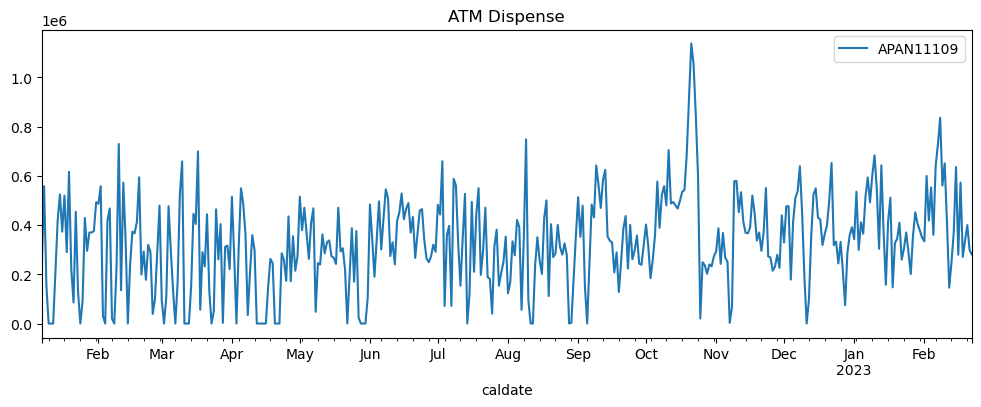

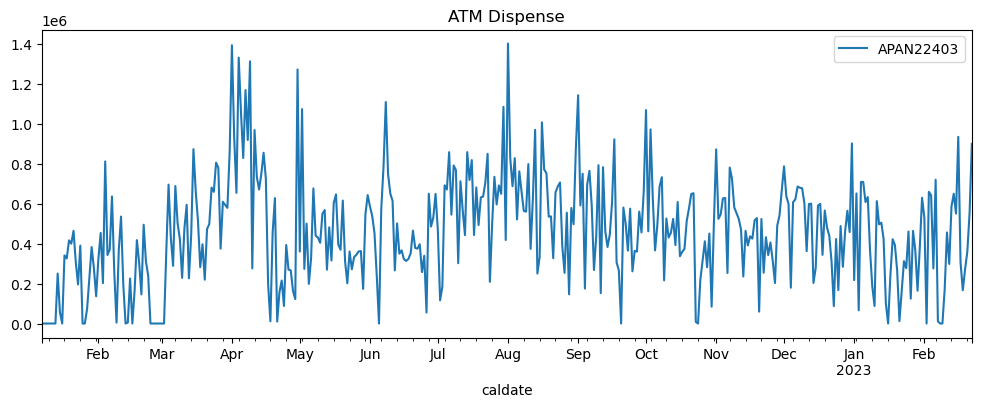

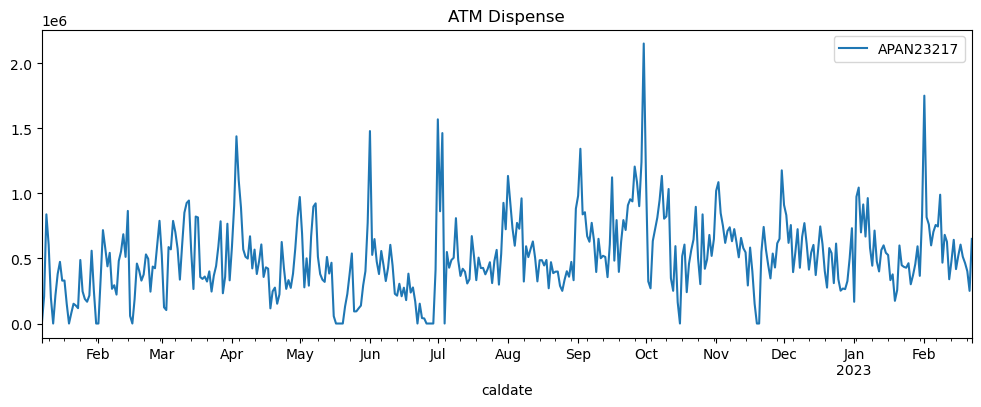

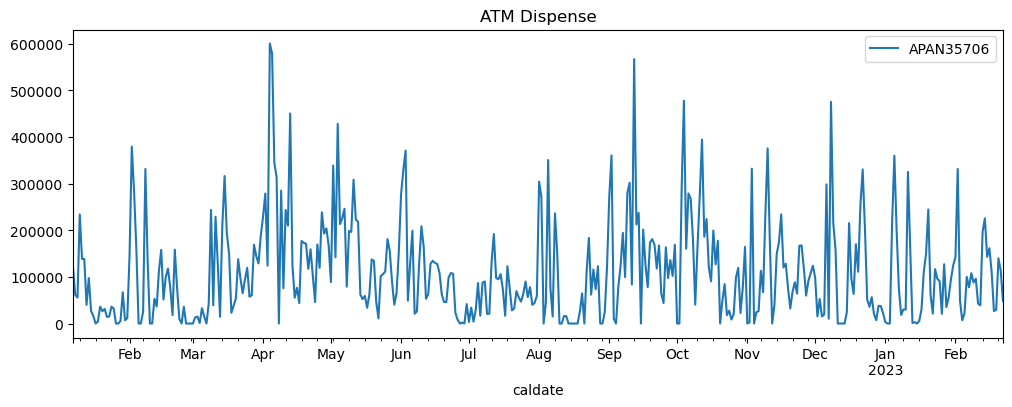

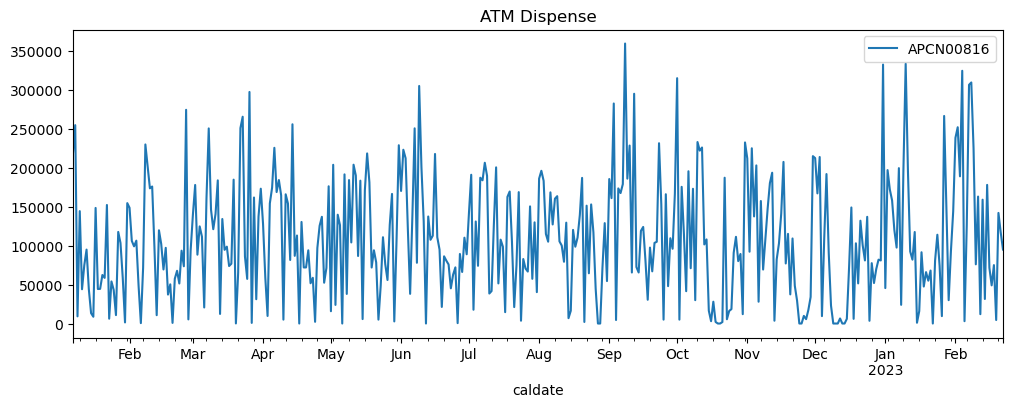

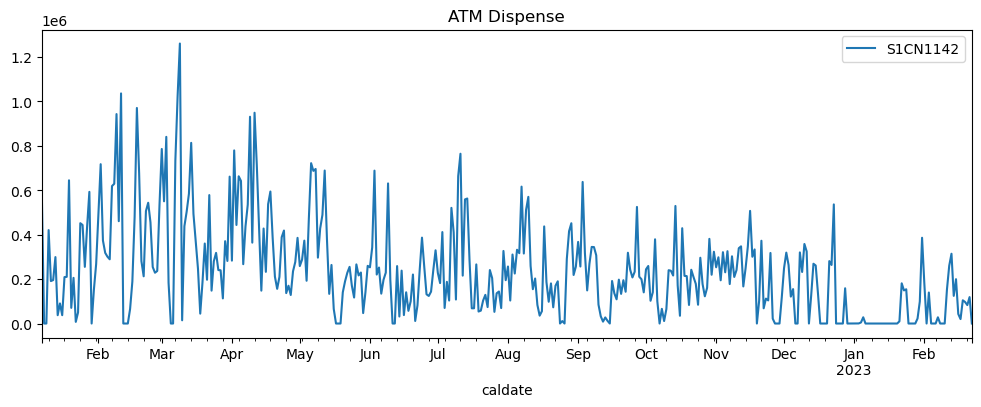

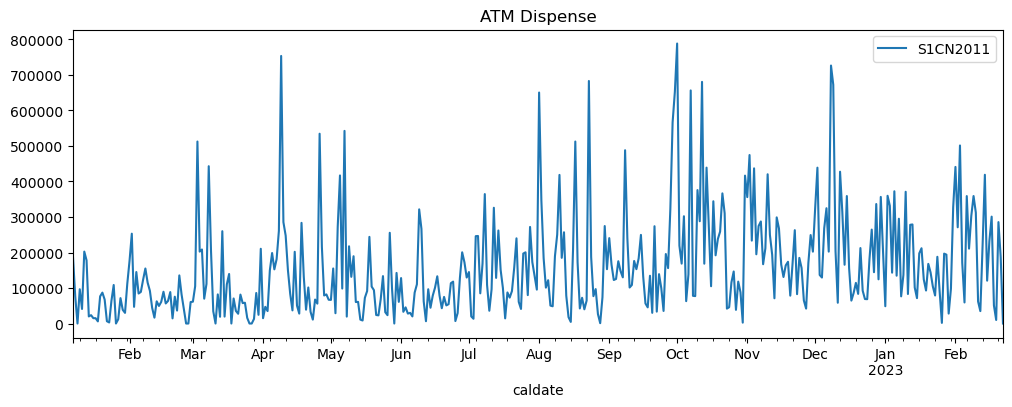

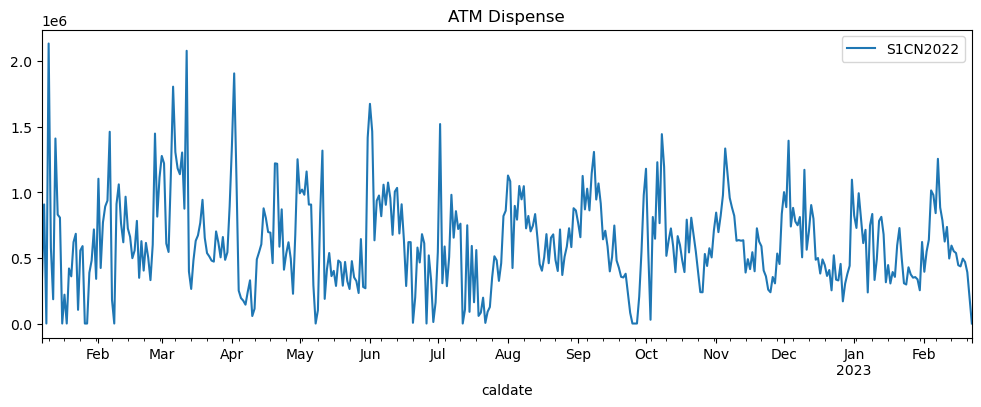

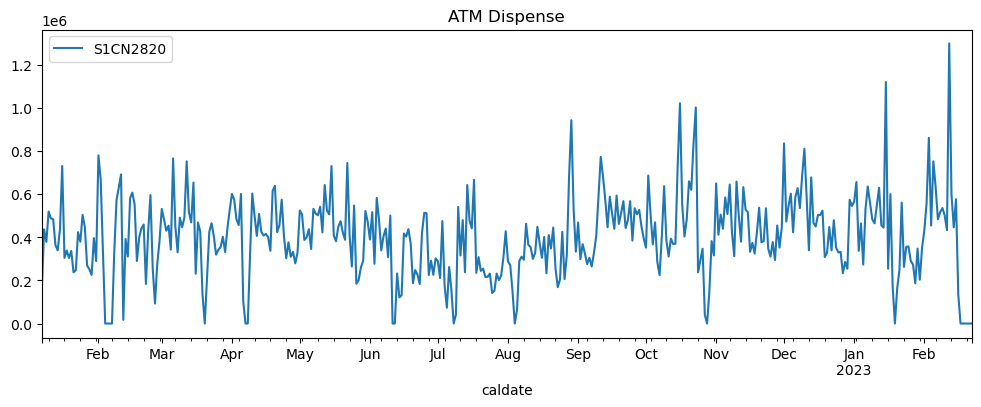

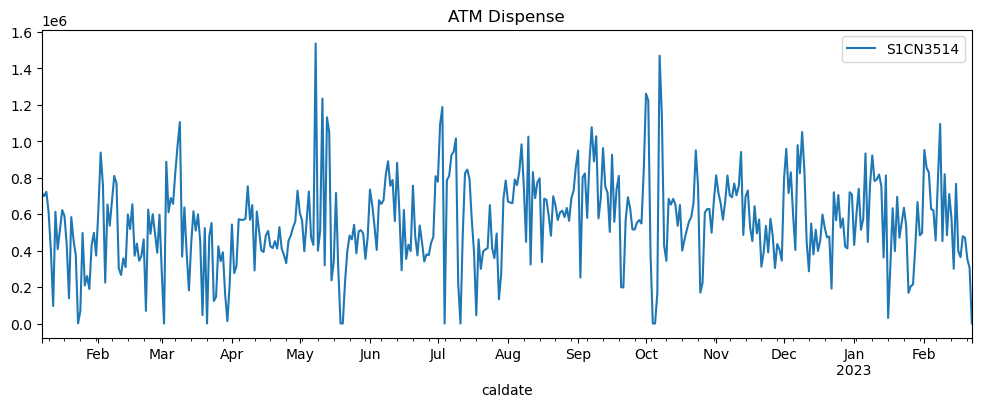

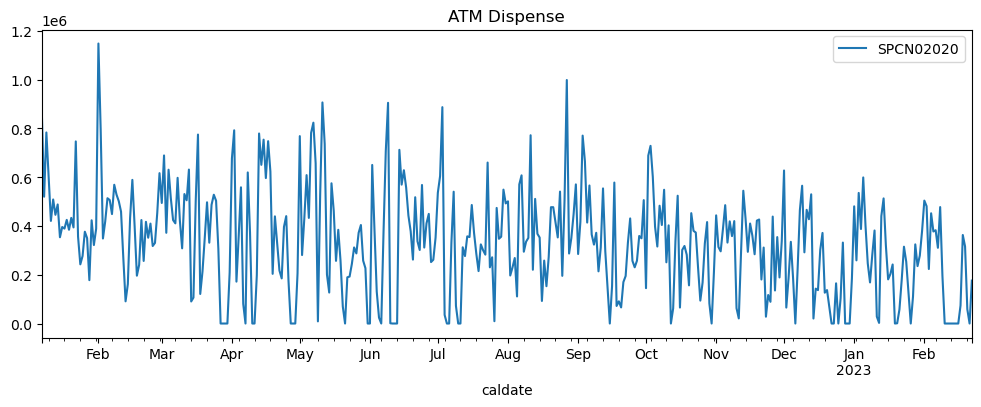

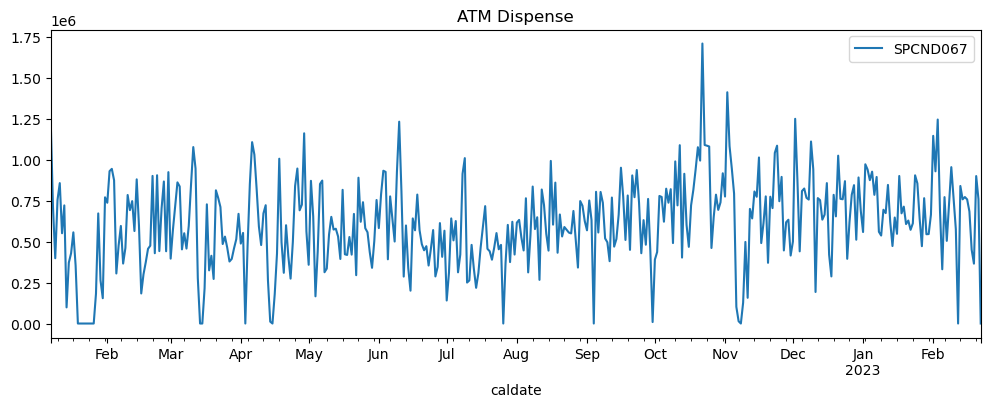

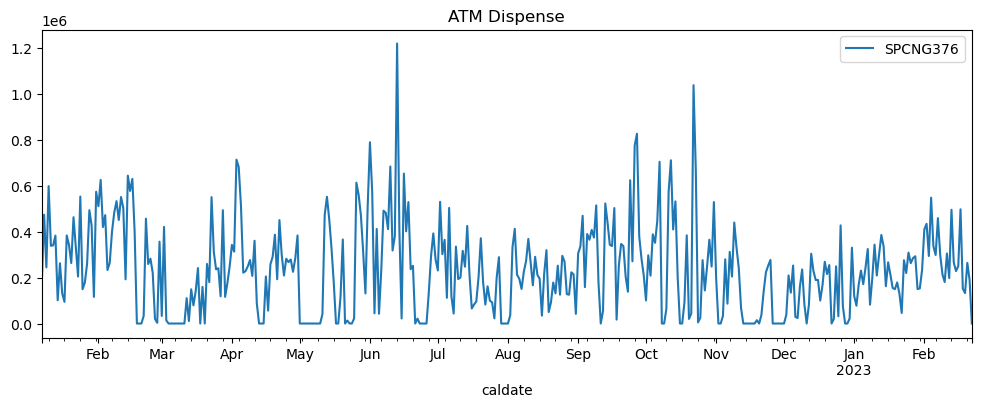

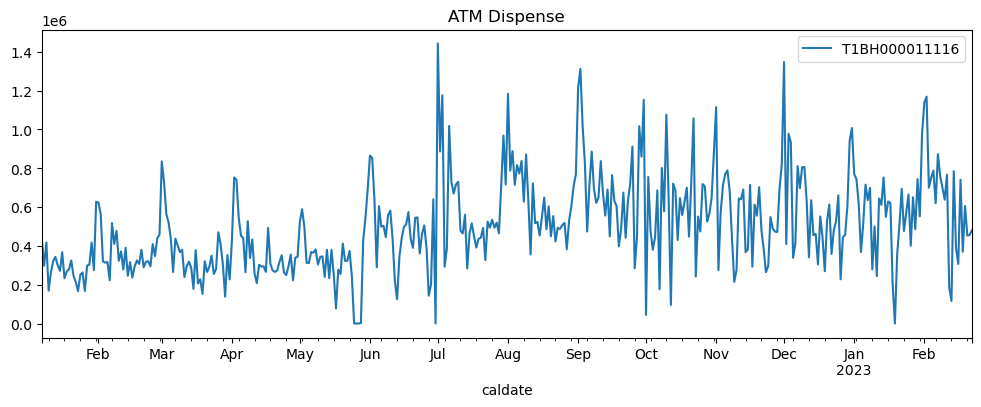

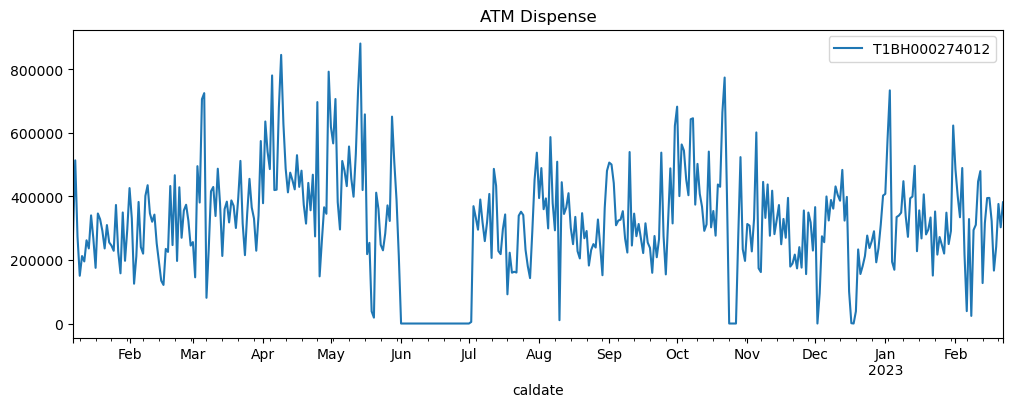

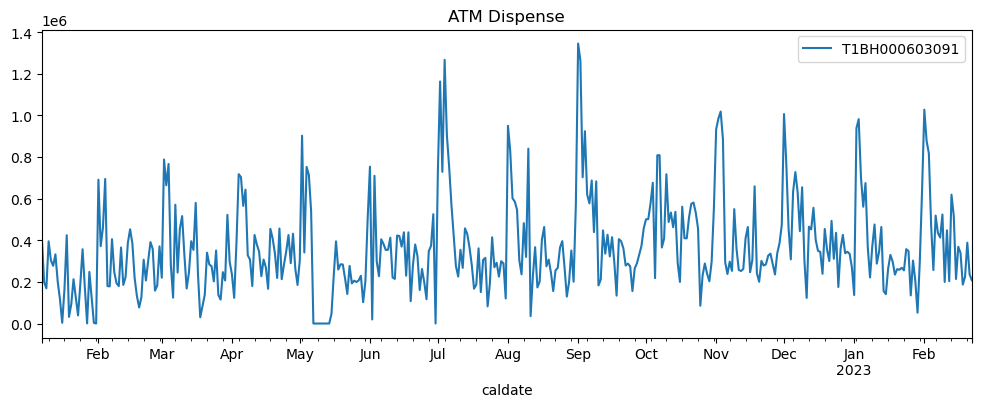

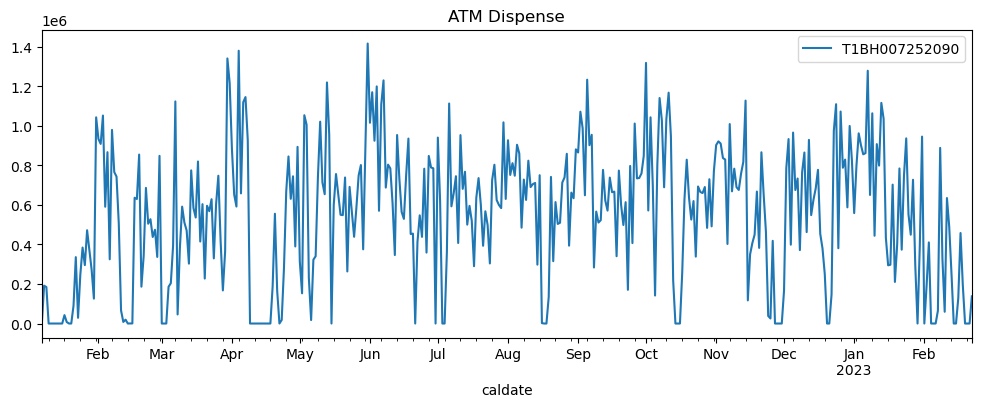

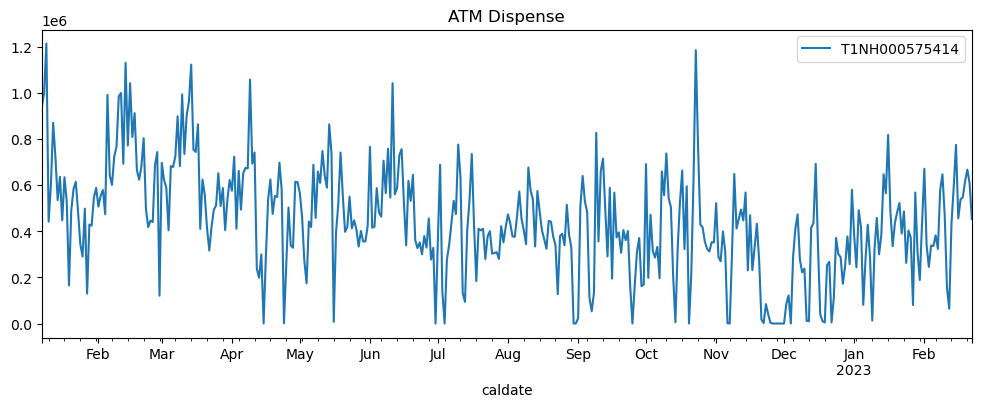

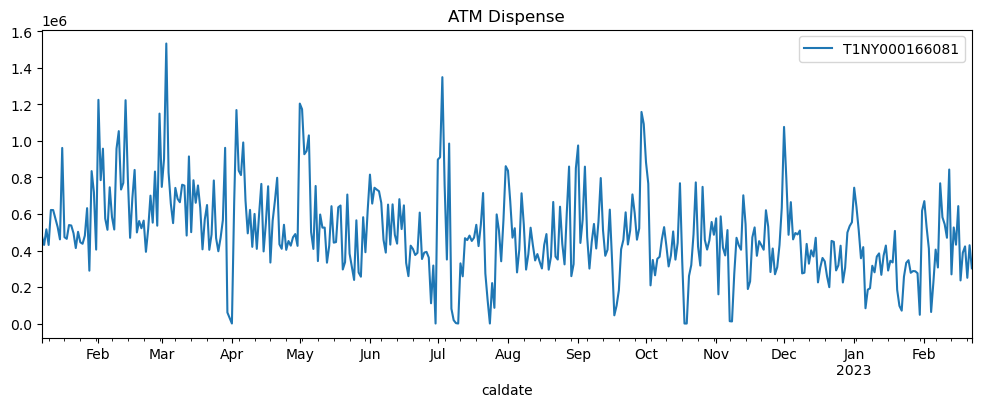

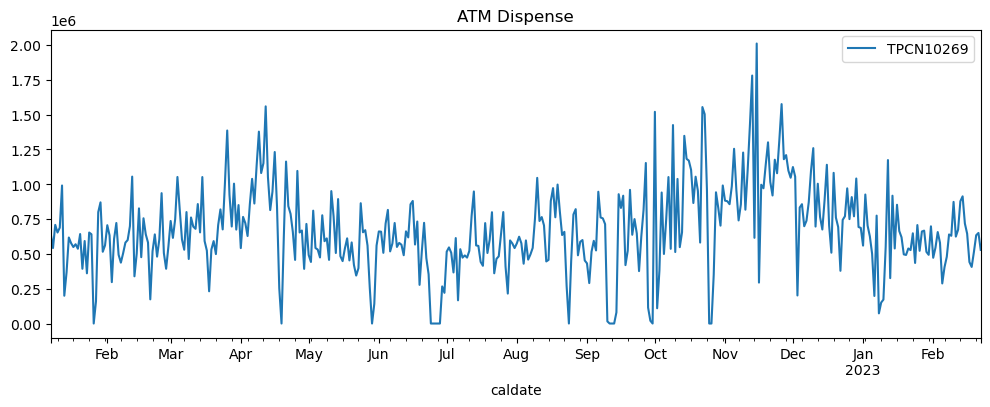

In [7]:
#Plot
for atm in df_new.columns:
    df_new.loc[:, [atm]].plot(figsize=(12, 4))
    plt.legend(loc='best')
    plt.title('ATM Dispense')
    plt.show(block=False)

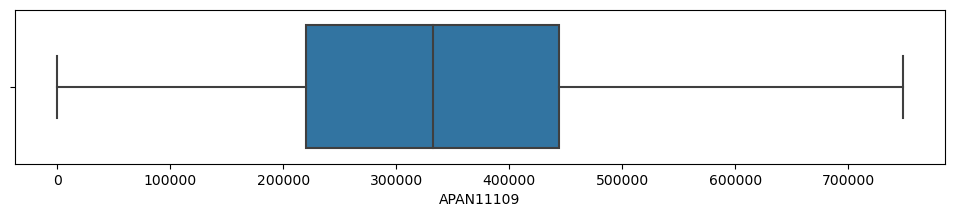

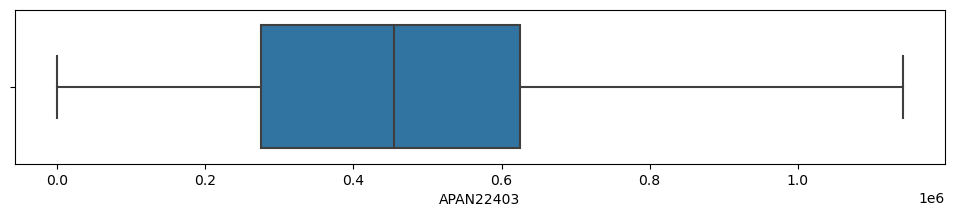

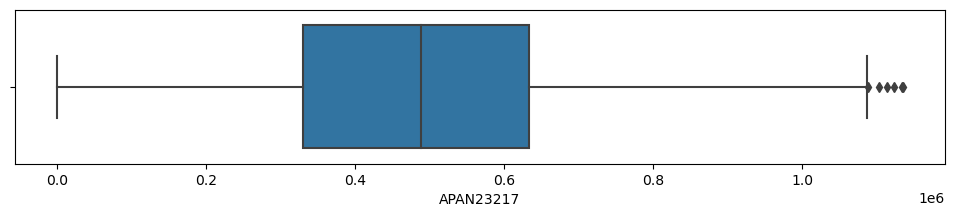

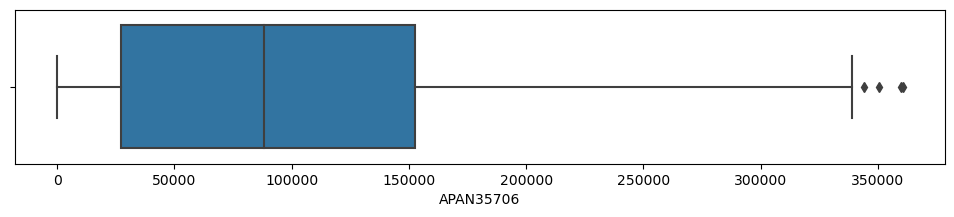

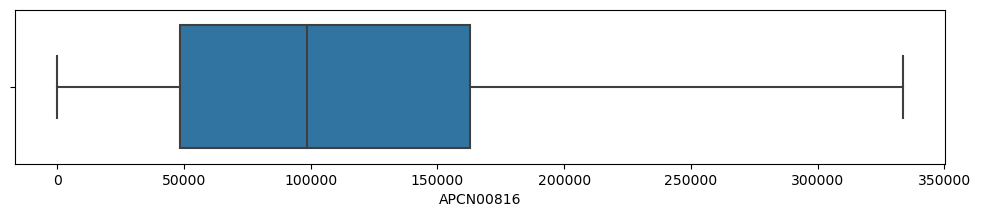

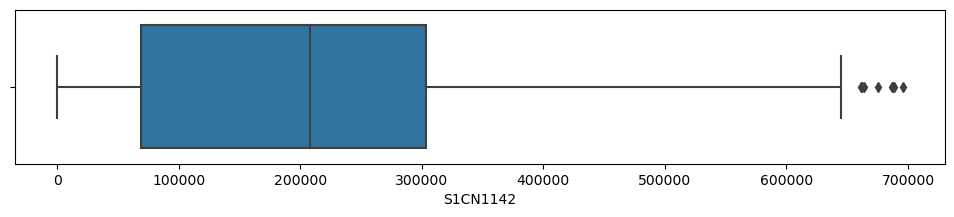

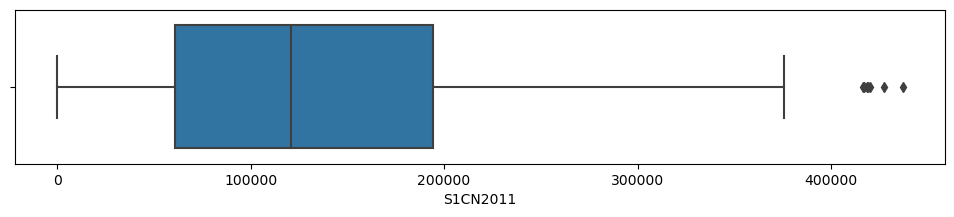

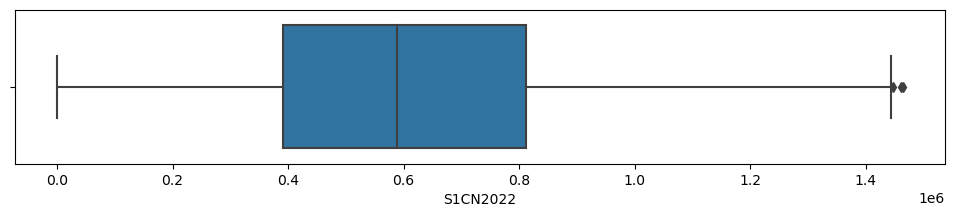

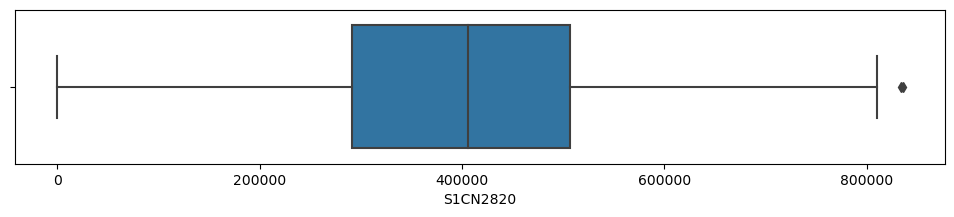

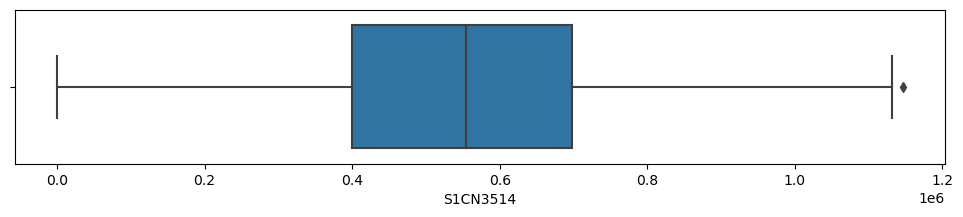

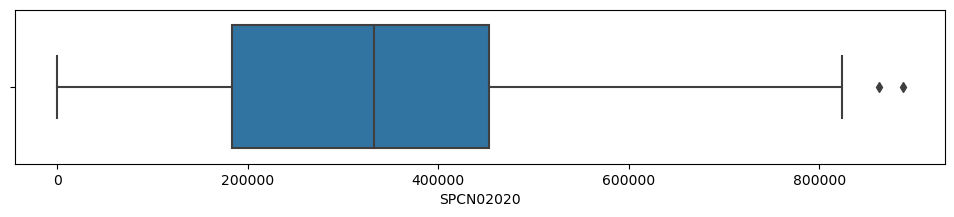

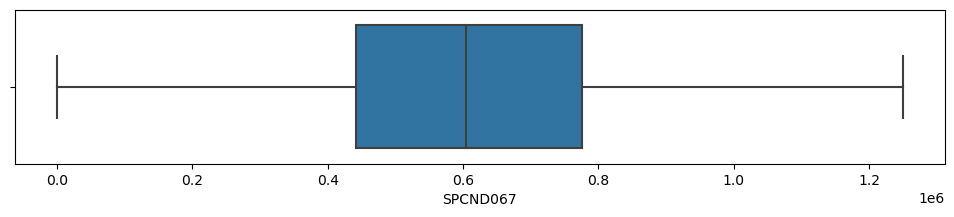

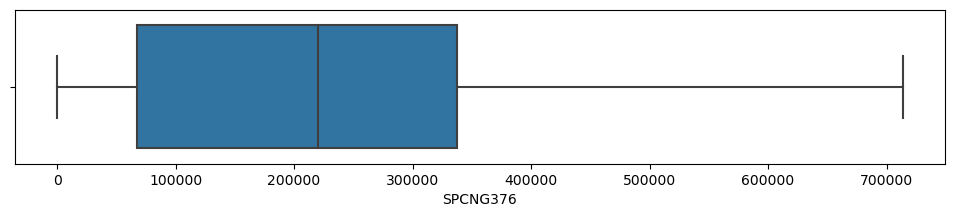

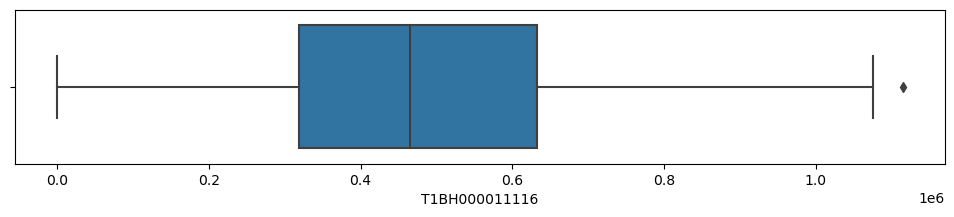

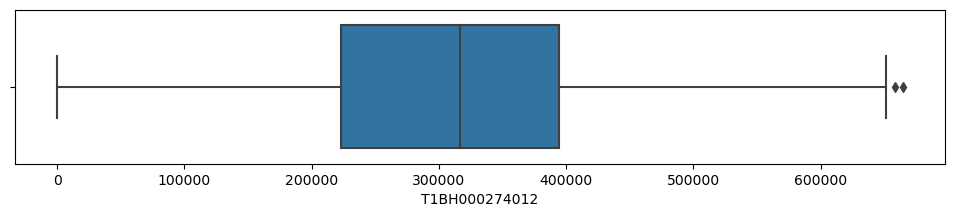

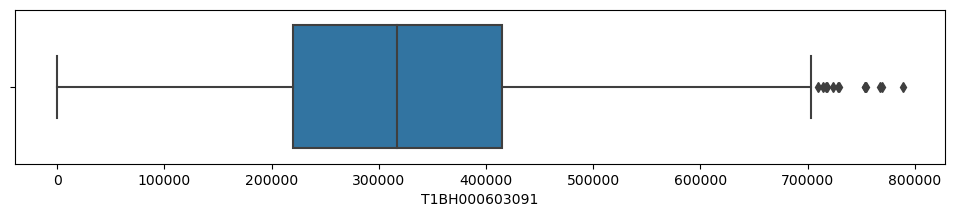

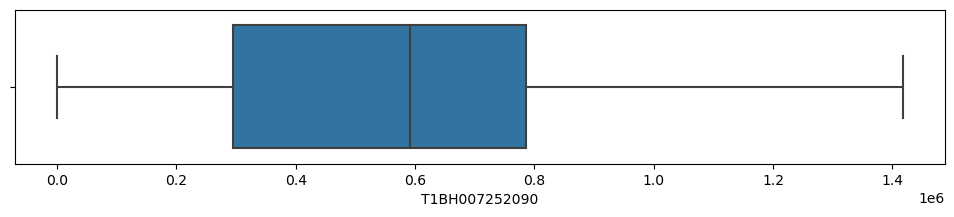

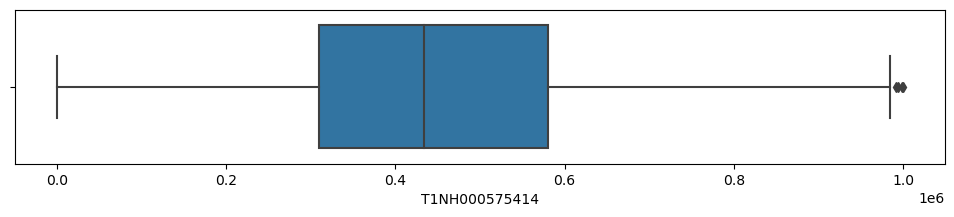

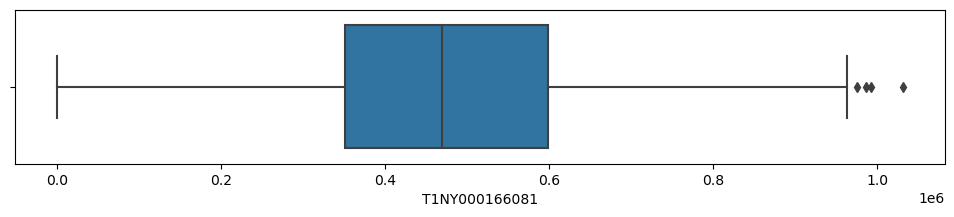

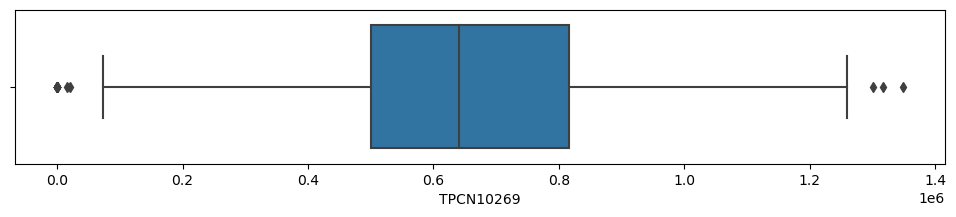

In [8]:
import seaborn as sns
for atm in df_new.columns: 
    atm_median = df_new[atm].median()
    max_limit = df_new[atm].quantile(0.75) + 1.5*(df_new[atm].quantile(0.75) - df_new[atm].quantile(0.25))
    df_new.loc[df_new[atm] > max_limit, [atm]] = atm_median
    fig = plt.subplots(figsize=(12, 2))
    ax = sns.boxplot(x=df_new[atm],whis=1.5)

In [9]:
df_new

APAN11109  APAN22403  APAN23217  APAN35706  APCN00816  S1CN1142  \
caldate                                                                       
2022-01-07   247500.0        0.0        0.0   121000.0   218300.0  575000.0   
2022-01-08   557500.0        0.0   207500.0    61500.0   254700.0       0.0   
2022-01-09   156000.0        0.0   839000.0    55500.0     9200.0       0.0   
2022-01-10        0.0        0.0   607800.0   234000.0   144300.0  420500.0   
2022-01-11        0.0        0.0   197500.0   138500.0    44000.0  191000.0   
...               ...        ...        ...        ...        ...       ...   
2023-02-18   270500.0   166500.0   513100.0    26800.0    75000.0  104500.0   
2023-02-19   337500.0   270500.0   464600.0    29300.0     4500.0   97000.0   
2023-02-20   399500.0   359000.0   401800.0   139900.0   142000.0   83000.0   
2023-02-21   298000.0   553500.0   250900.0   113900.0   117000.0  119000.0   
2023-02-22   280500.0   898500.0   650400.0    48000.0    95000.0       0.0   

            S1CN2011  S1CN2022  S1CN2820  S1CN3514  SPCN02020   SPCND067  \
caldate                                                                    
2022-01-07  188500.0  306900.0  156800.0  717500.0   862100.0  1236500.0   
2022-01-08   76500.0  907800.0  436700.0  698500.0   520000.0   711000.0   
2022-01-09       0.0       0.0  378500.0  722500.0   783400.0   398500.0   
2022-01-10   96500.0  589150.0  519500.0  608000.0   604000.0   754500.0   
2022-01-11   41000.0  576900.0  487500.0  398500.0   420700.0   857000.0   
...              ...       ...       ...       ...        ...        ...   
2023-02-18   51000.0  494600.0       0.0  479000.0   363000.0   450000.0   
2023-02-19   10000.0  468900.0       0.0  470000.0   316000.0   365500.0   
2023-02-20  285600.0  390700.0       0.0  353500.0    58500.0   900000.0   
2023-02-21  186600.0  196400.0       0.0  305500.0        0.0   759000.0   
2023-02-22       0.0       0.0       0.0       0.0   176000.0        0.0   

            SPCNG376  T1BH000011116  T1BH000274012  T1BH000603091  \
caldate                                                             
2022-01-07  177000.0       430200.0       276500.0       411500.0   
2022-01-08  474000.0       298100.0       513800.0       199500.0   
2022-01-09  244500.0       417900.0       273800.0       169000.0   
2022-01-10  598500.0       169000.0       150400.0       395000.0   
2022-01-11  338500.0       262600.0       212500.0       303500.0   
...              ...            ...            ...            ...   
2023-02-18  152000.0       369800.0       166700.0       187000.0   
2023-02-19  132500.0       605900.0       242100.0       225000.0   
2023-02-20  264000.0       453200.0       376500.0       388500.0   
2023-02-21  190000.0       456000.0       303000.0       236500.0   
2023-02-22       0.0       480200.0       381700.0       208000.0   

            T1BH007252090  T1NH000575414  T1NY000166081  TPCN10269  
caldate                                                             
2022-01-07            0.0       939500.0       481000.0   644900.0  
2022-01-08       191500.0       999000.0       430500.0   542200.0  
2022-01-09       184500.0       433250.0       516000.0   708600.0  
2022-01-10            0.0       441500.0       430500.0   653600.0  
2022-01-11            0.0       599000.0       622000.0   688300.0  
...                   ...            ...            ...        ...  
2023-02-18       195500.0       547500.0       387700.0   406500.0  
2023-02-19            0.0       616000.0       422600.0   514900.0  
2023-02-20            0.0       667500.0       250500.0   634300.0  
2023-02-21            0.0       609000.0       428900.0   650500.0  
2023-02-22       137600.0       452500.0       302500.0   528700.0  

[412 rows x 20 columns]

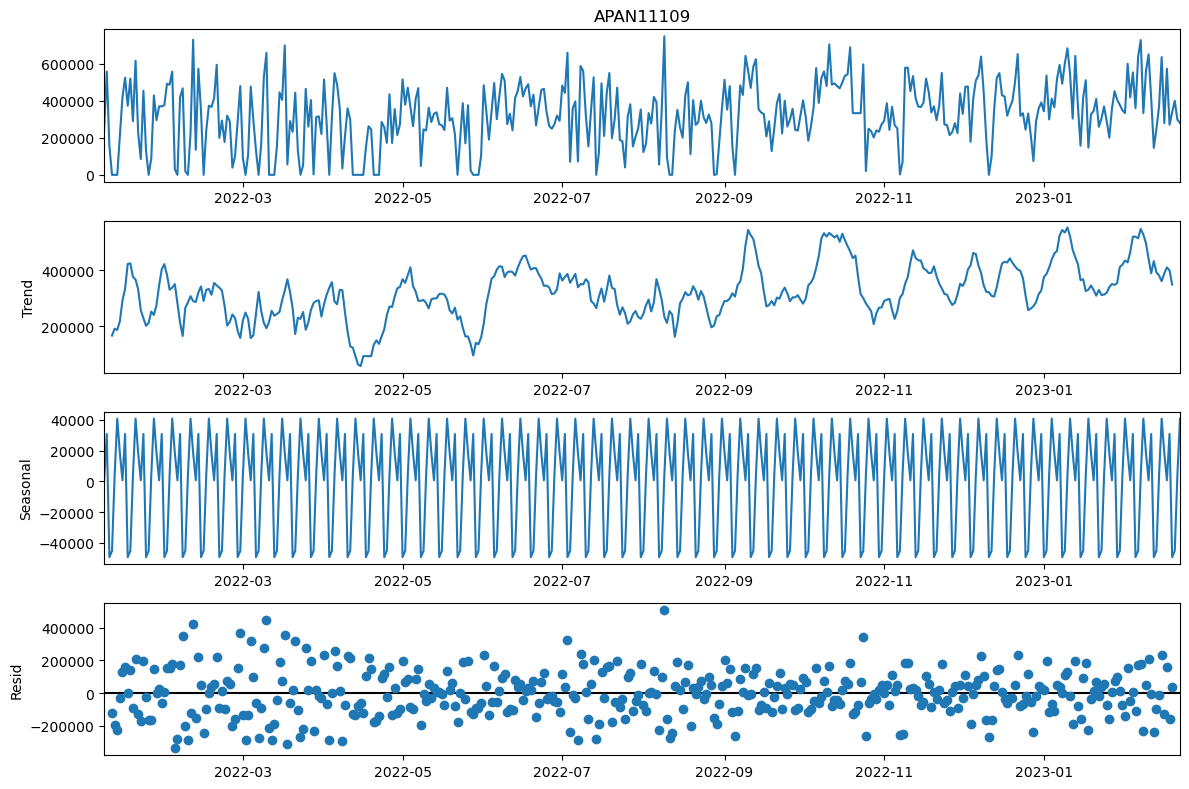

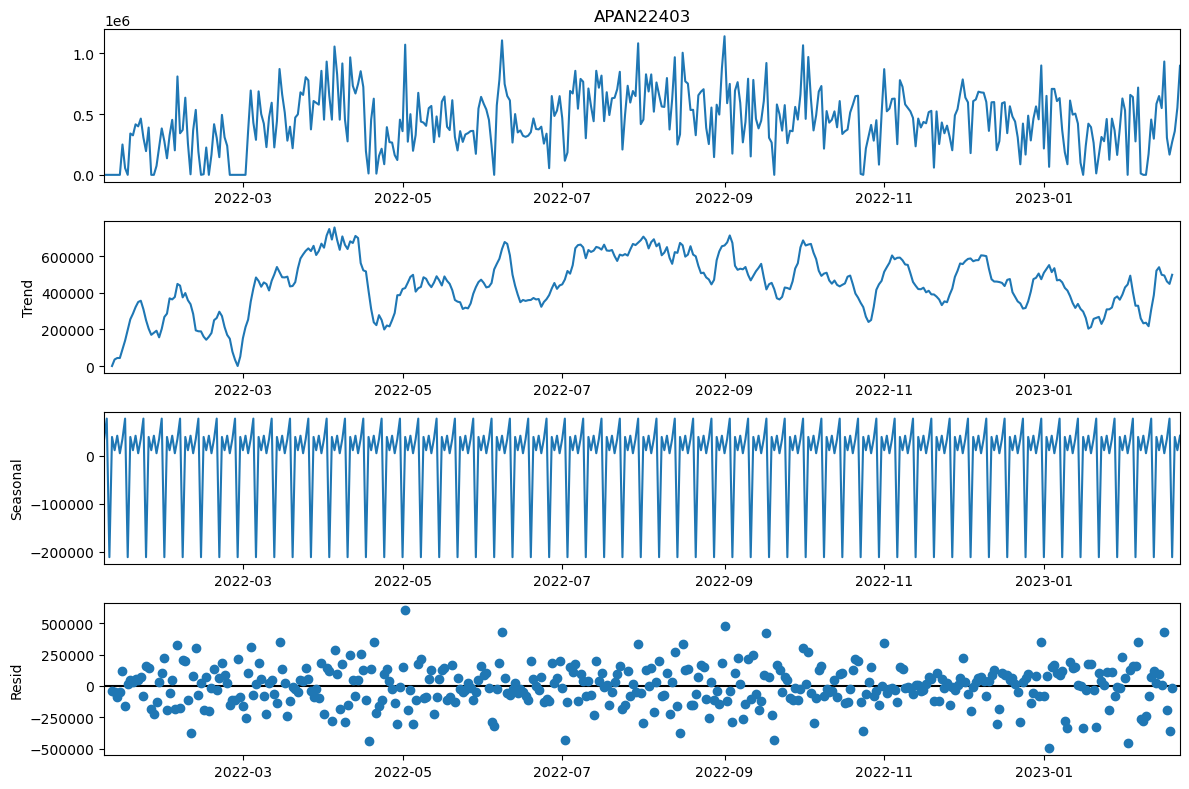

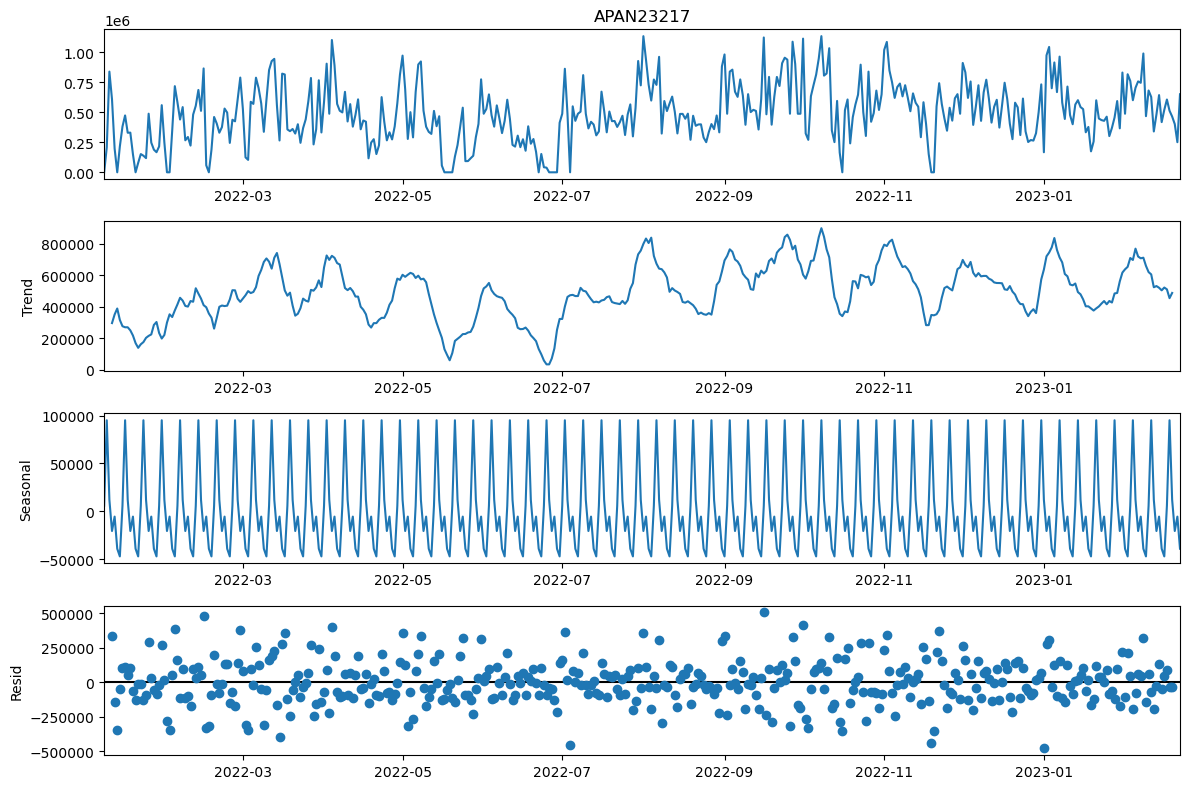

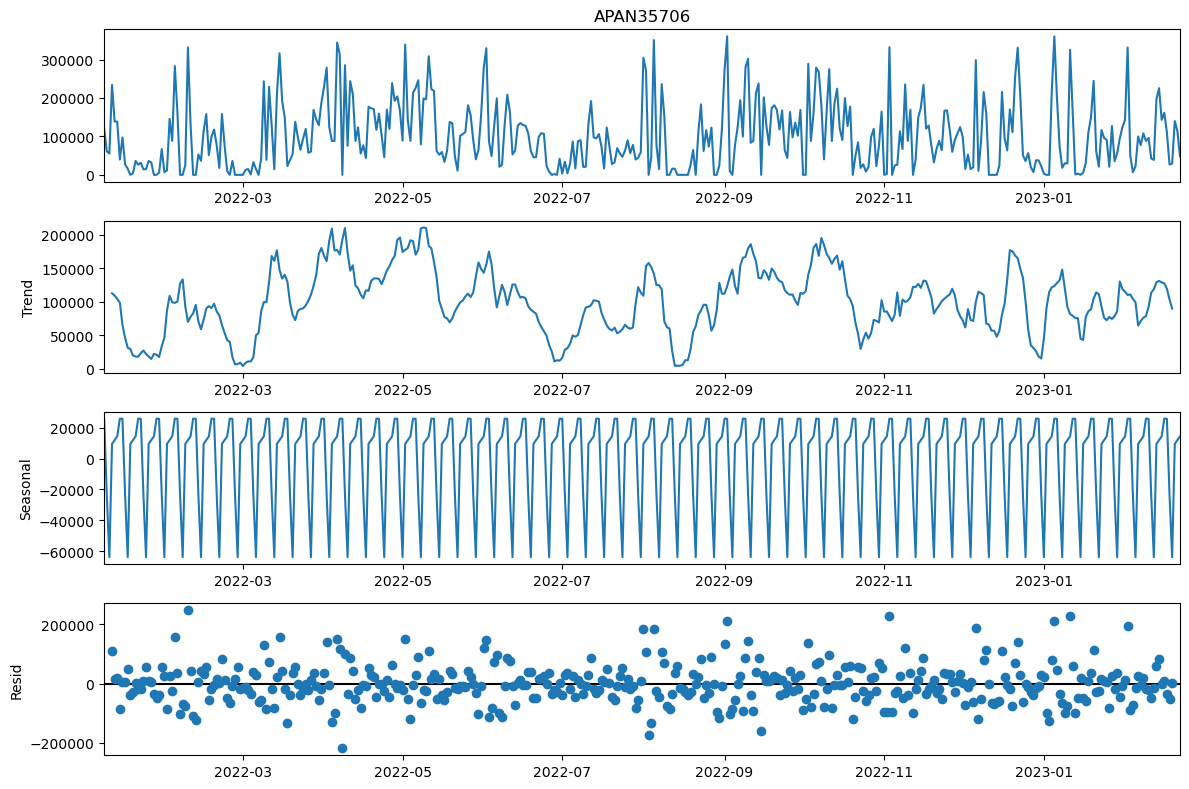

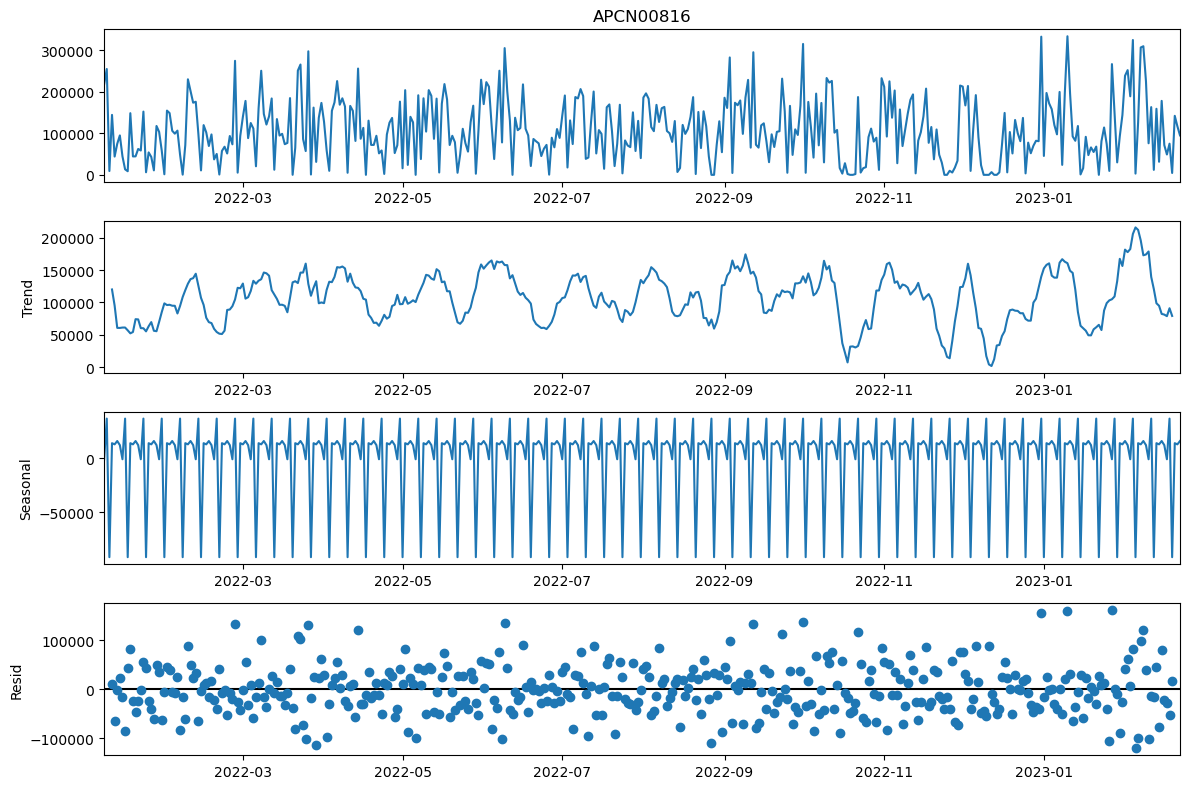

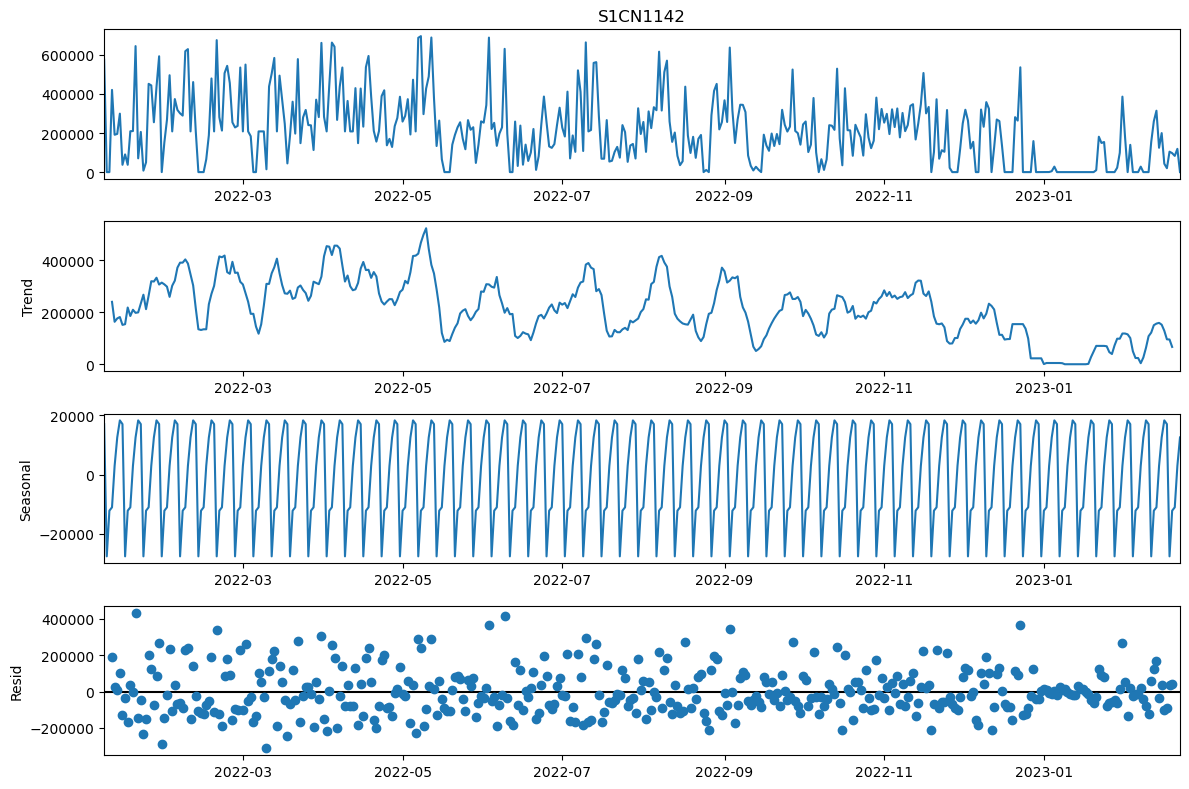

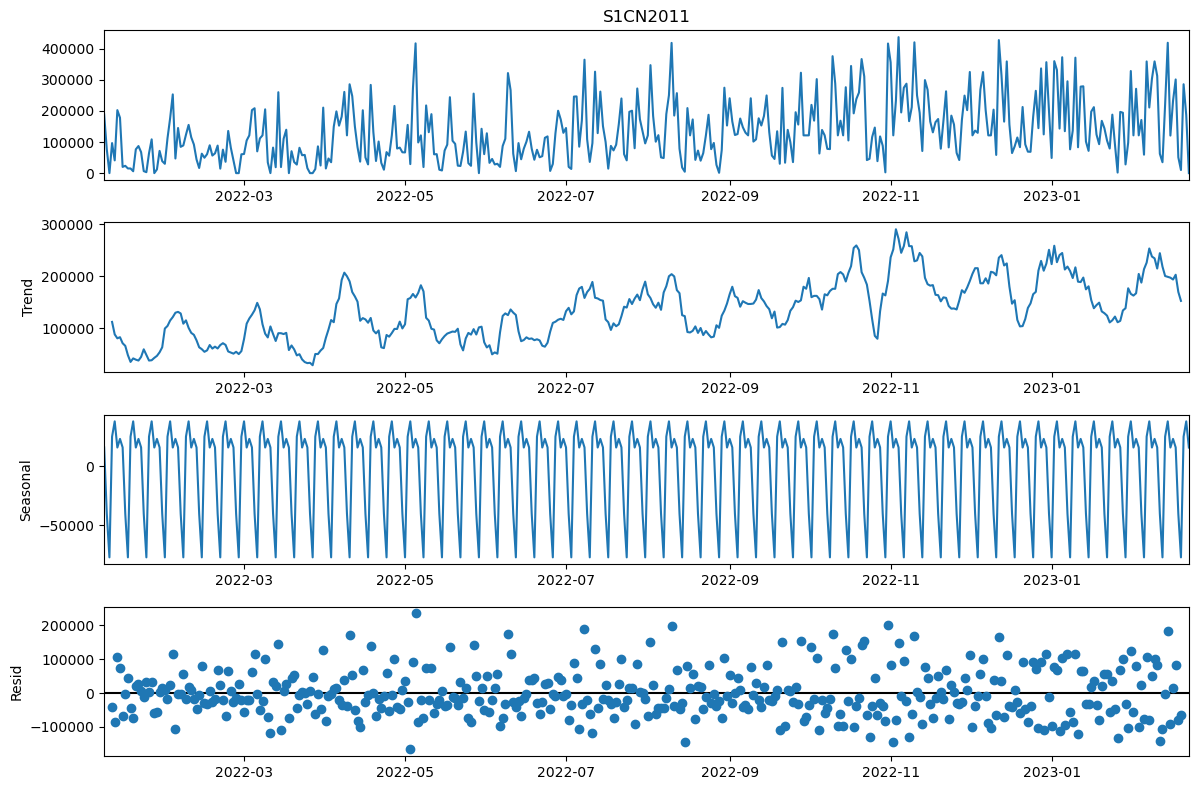

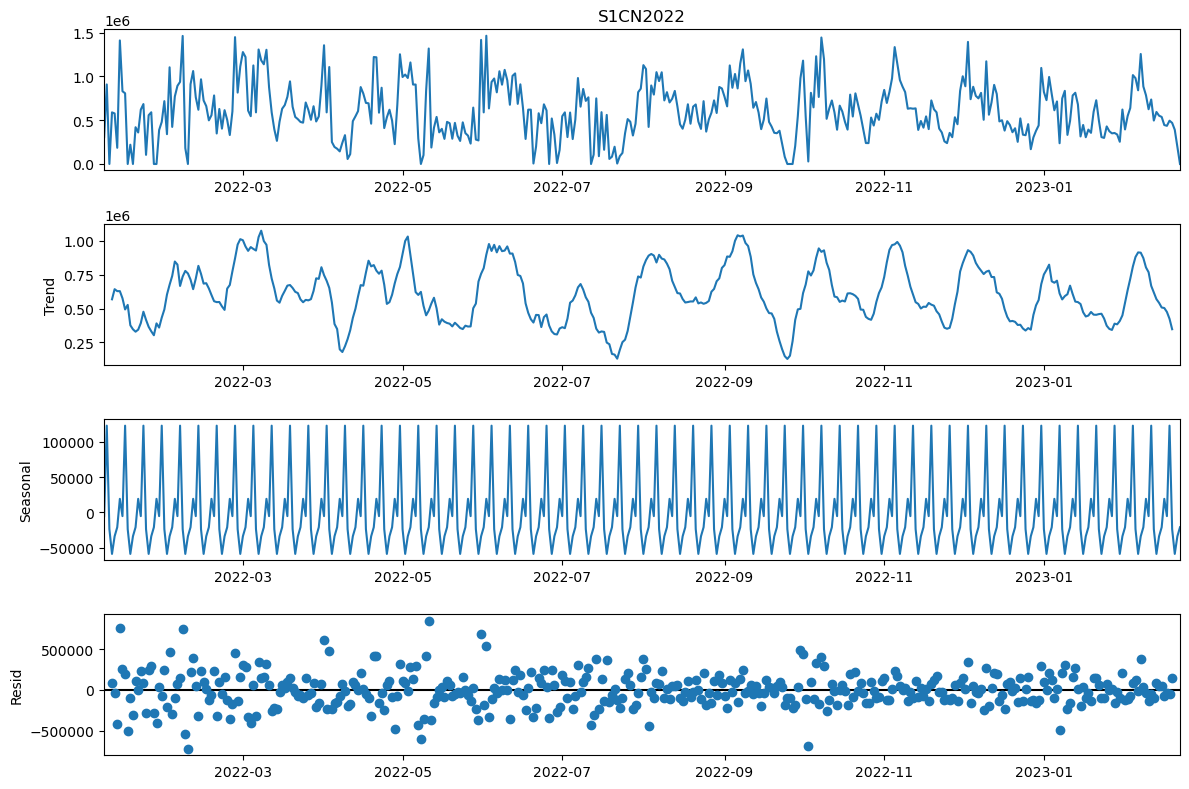

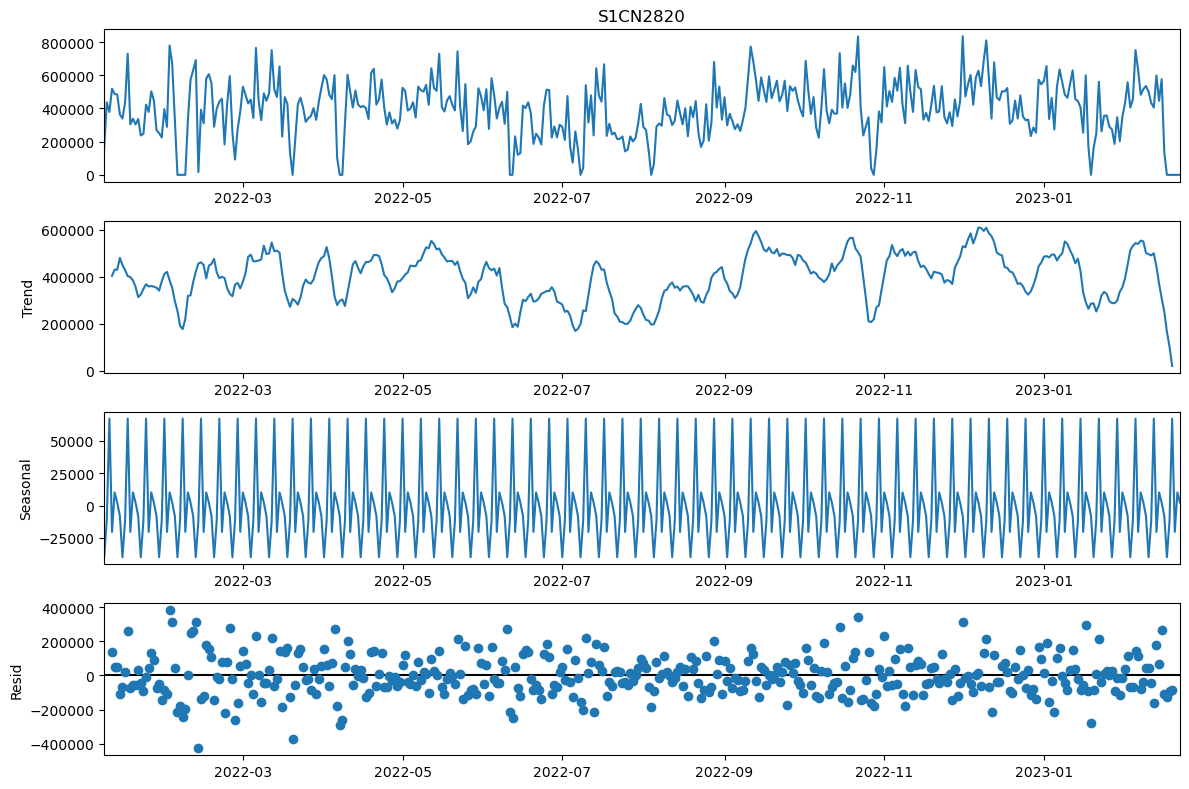

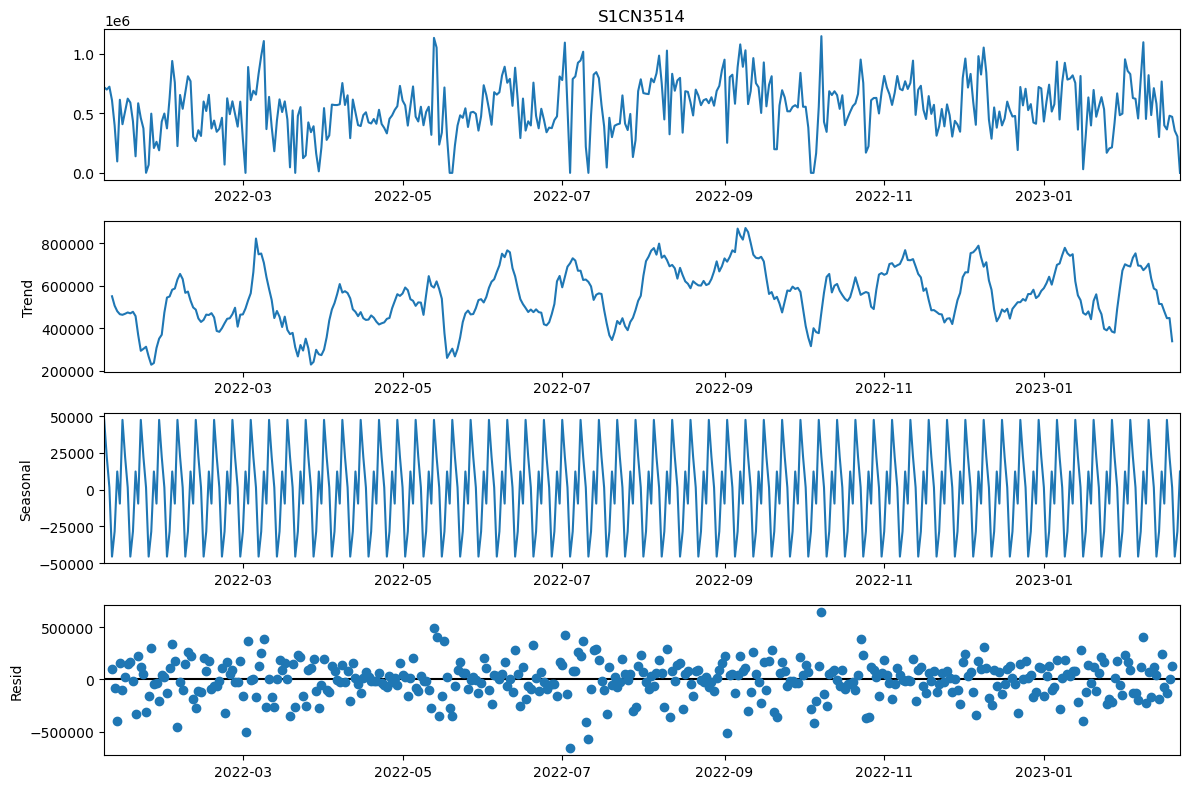

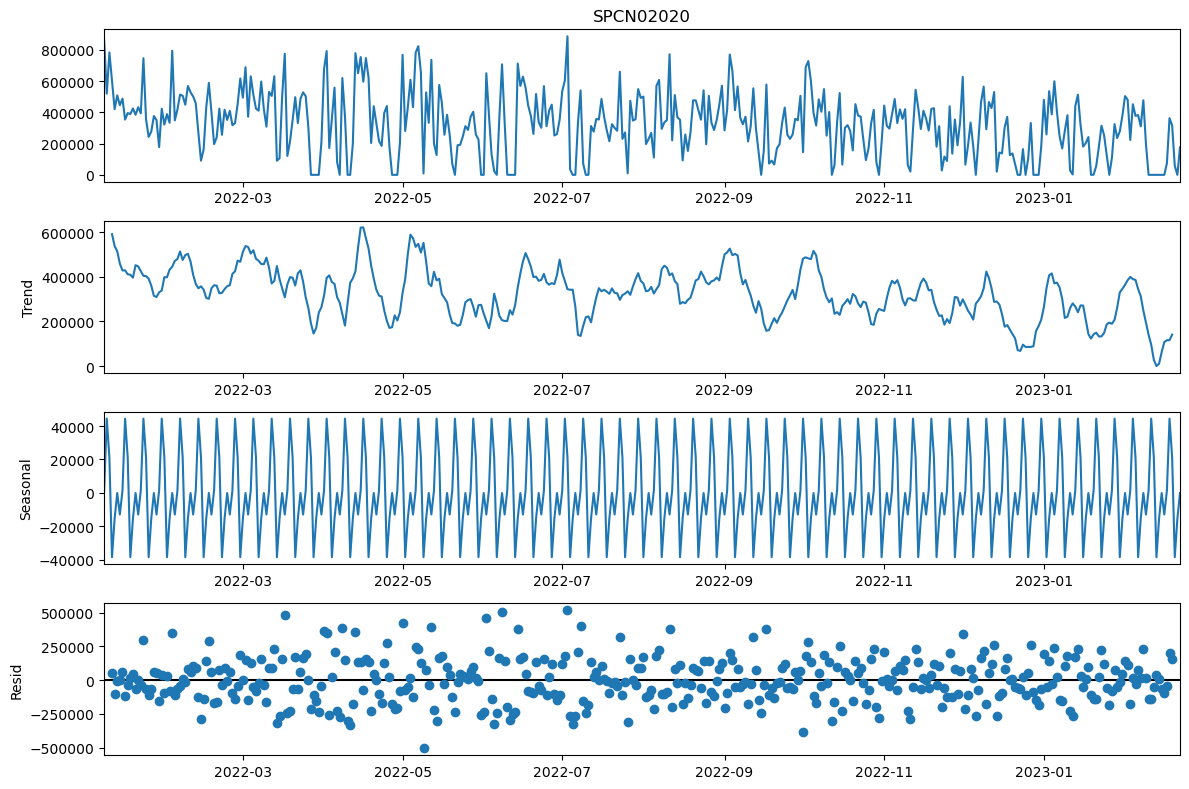

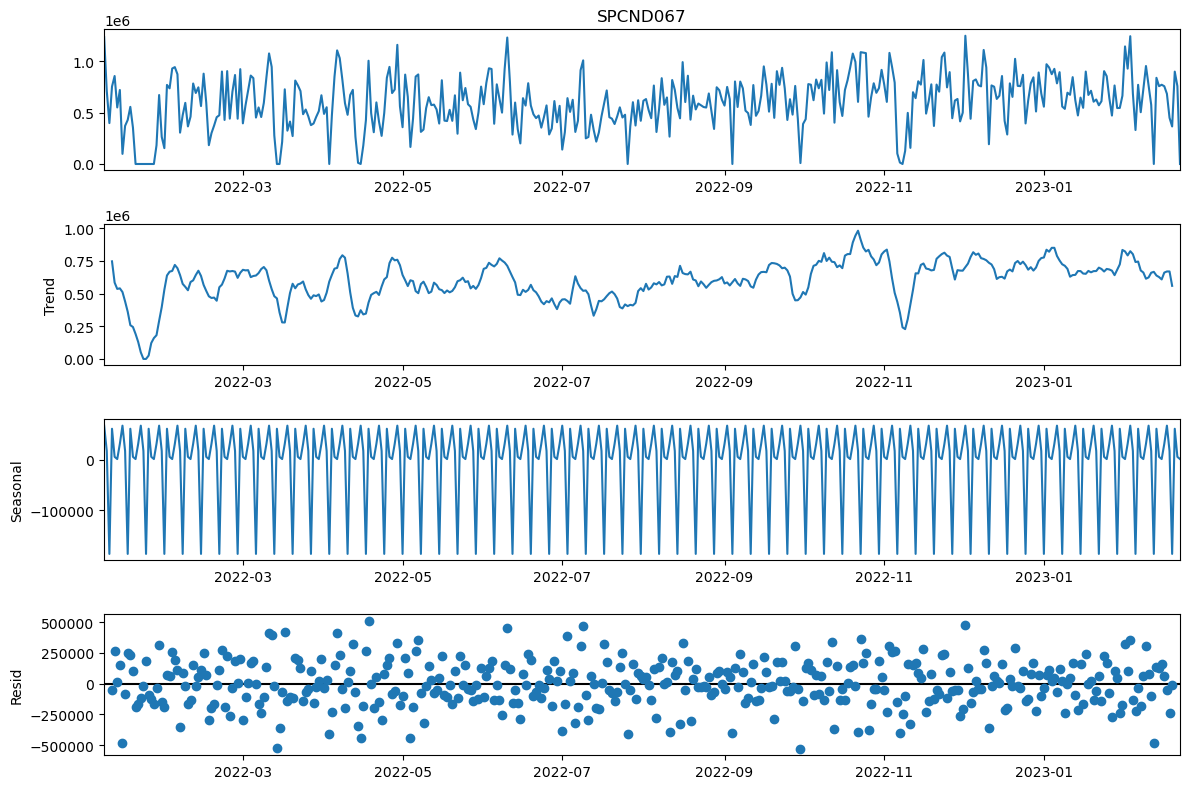

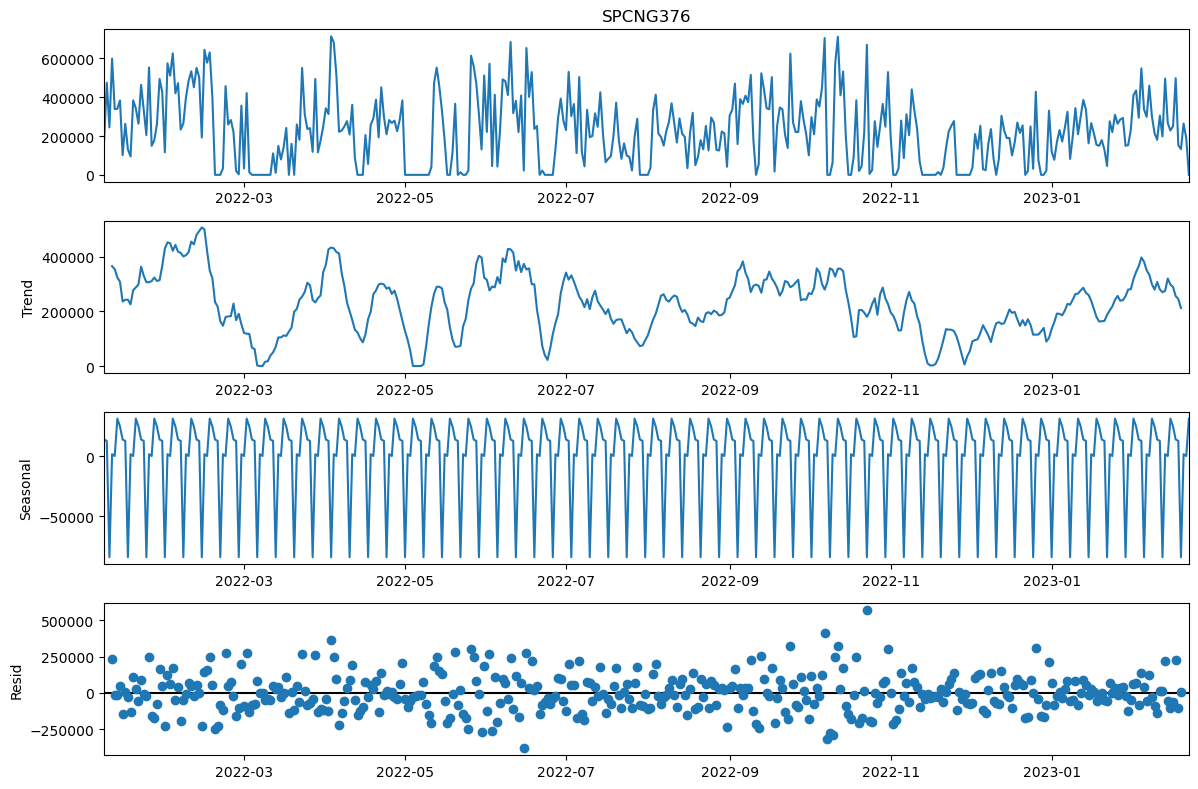

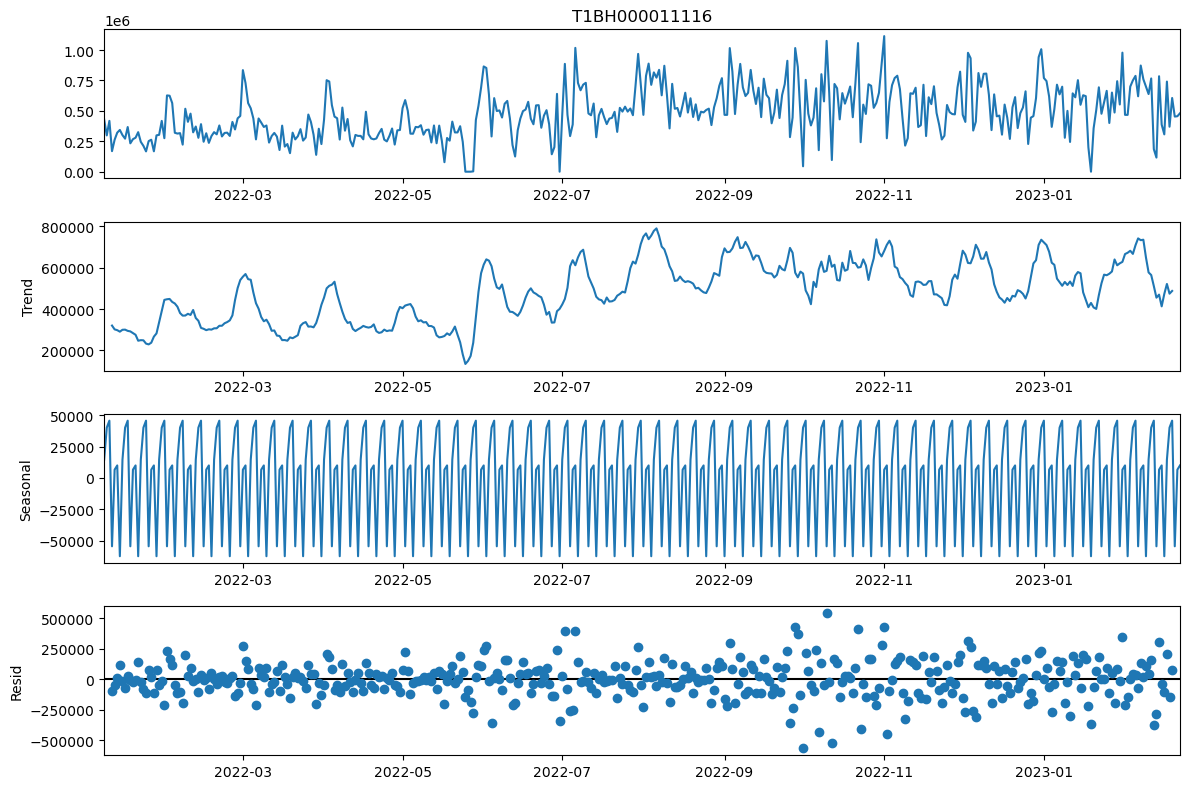

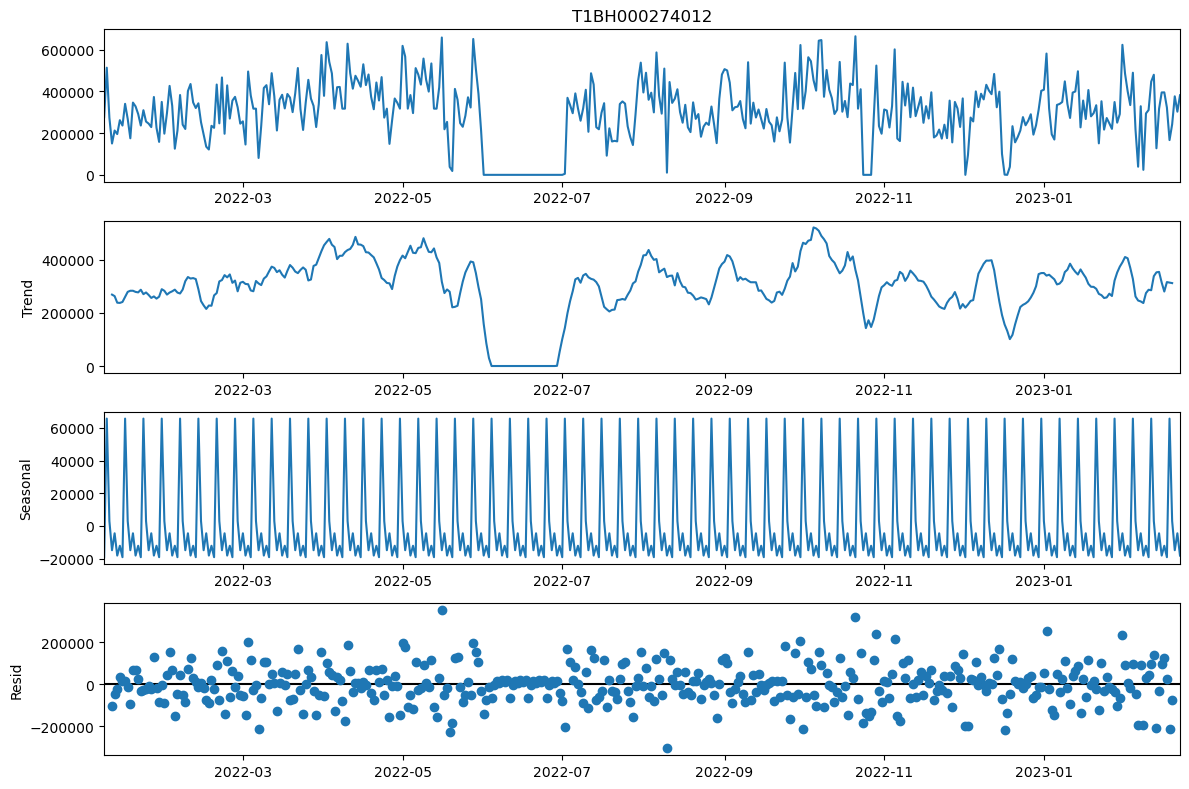

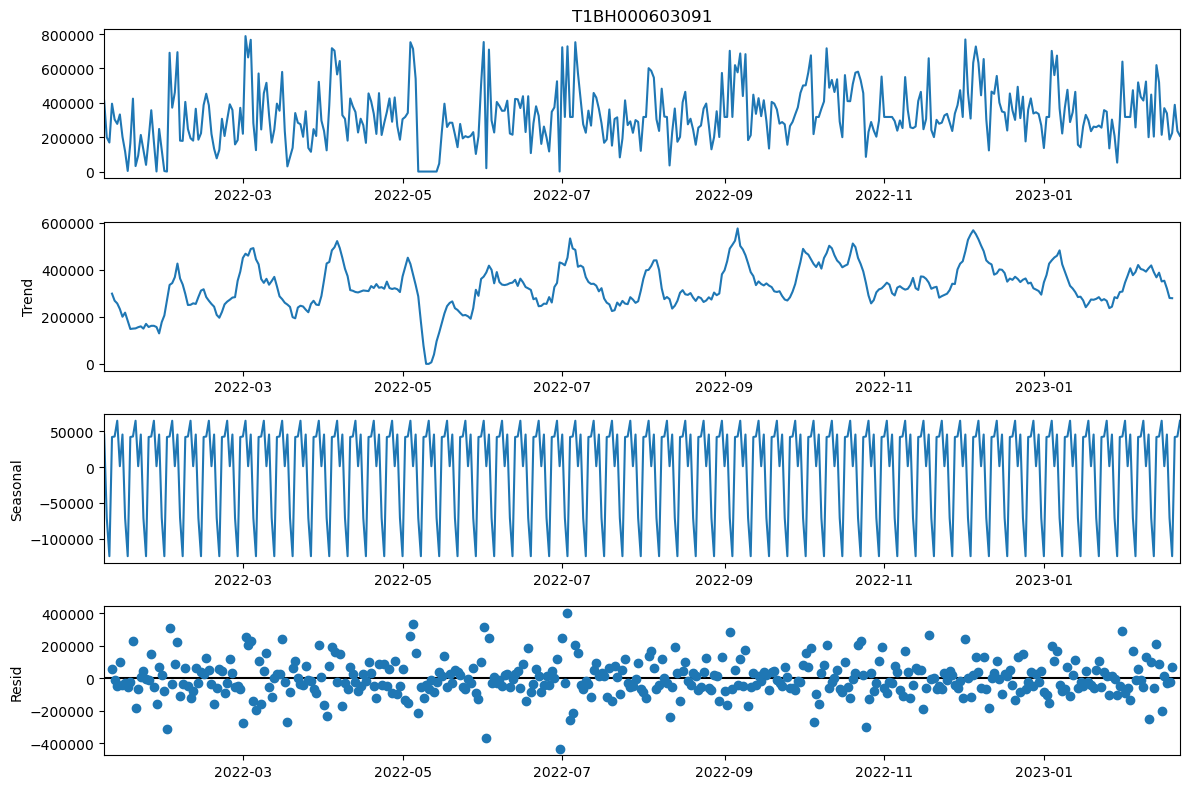

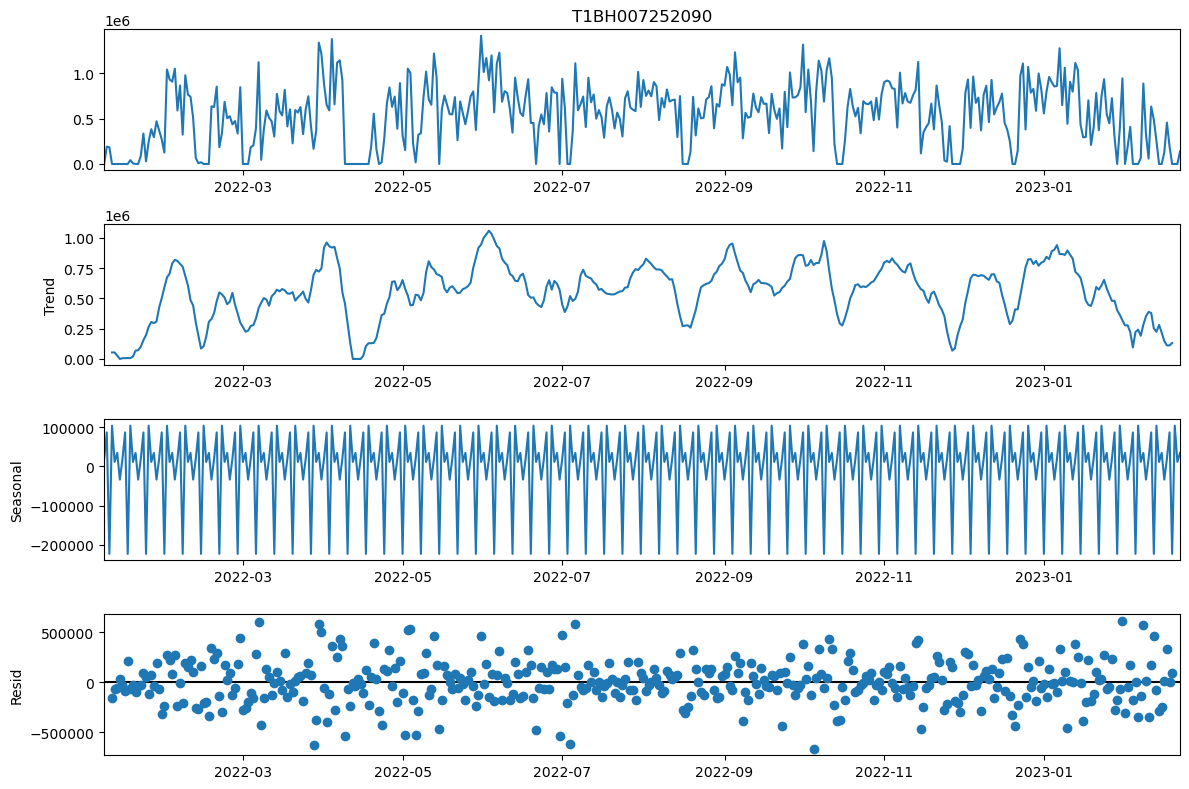

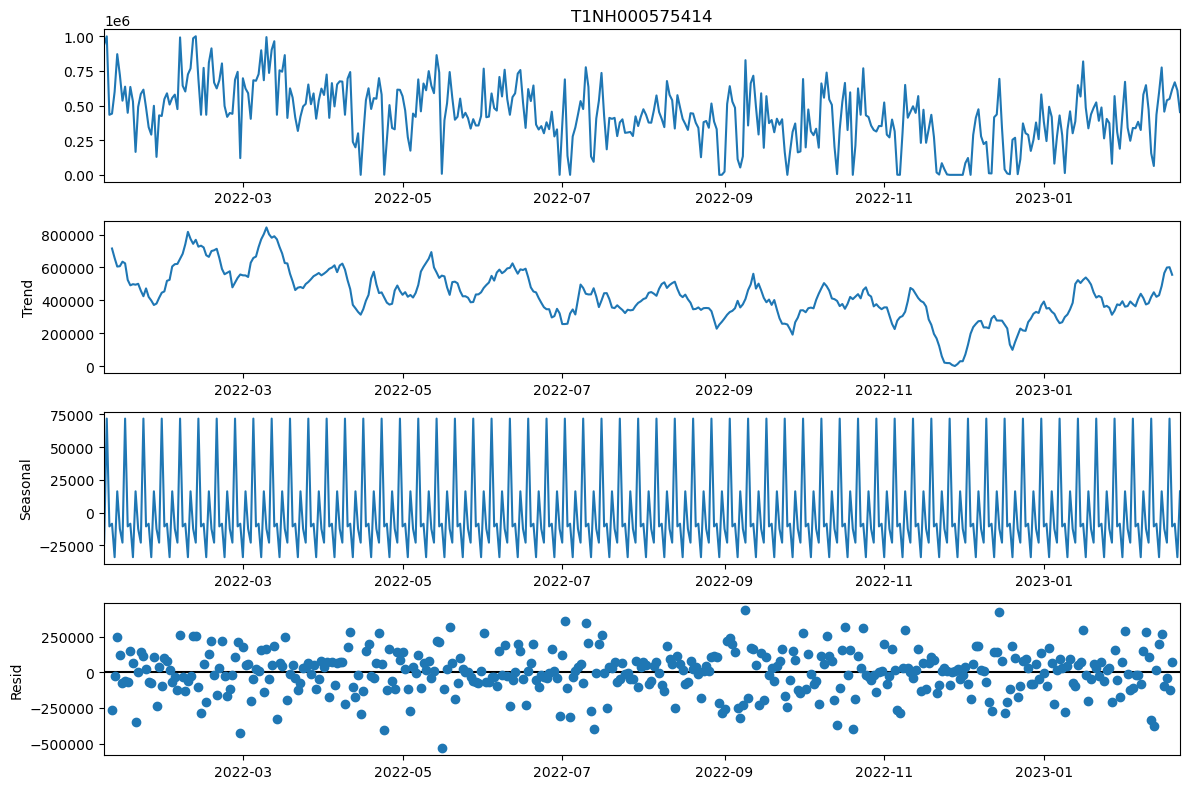

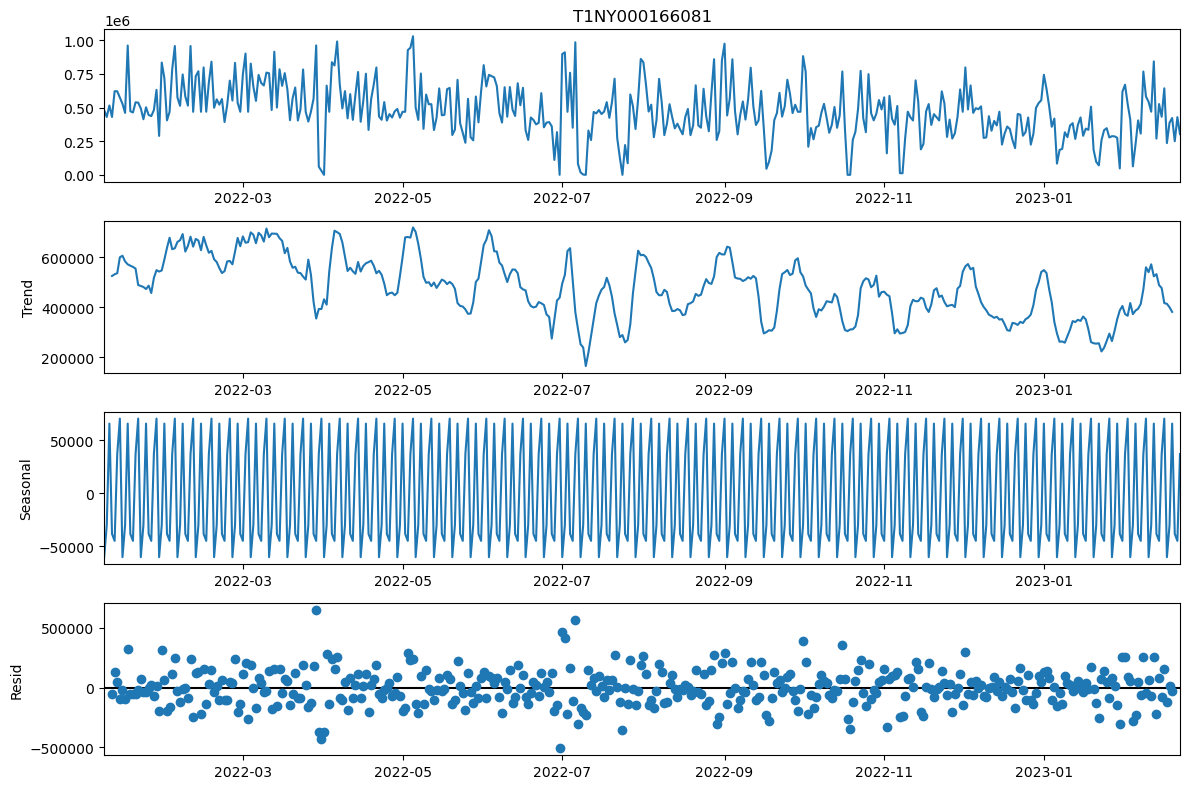

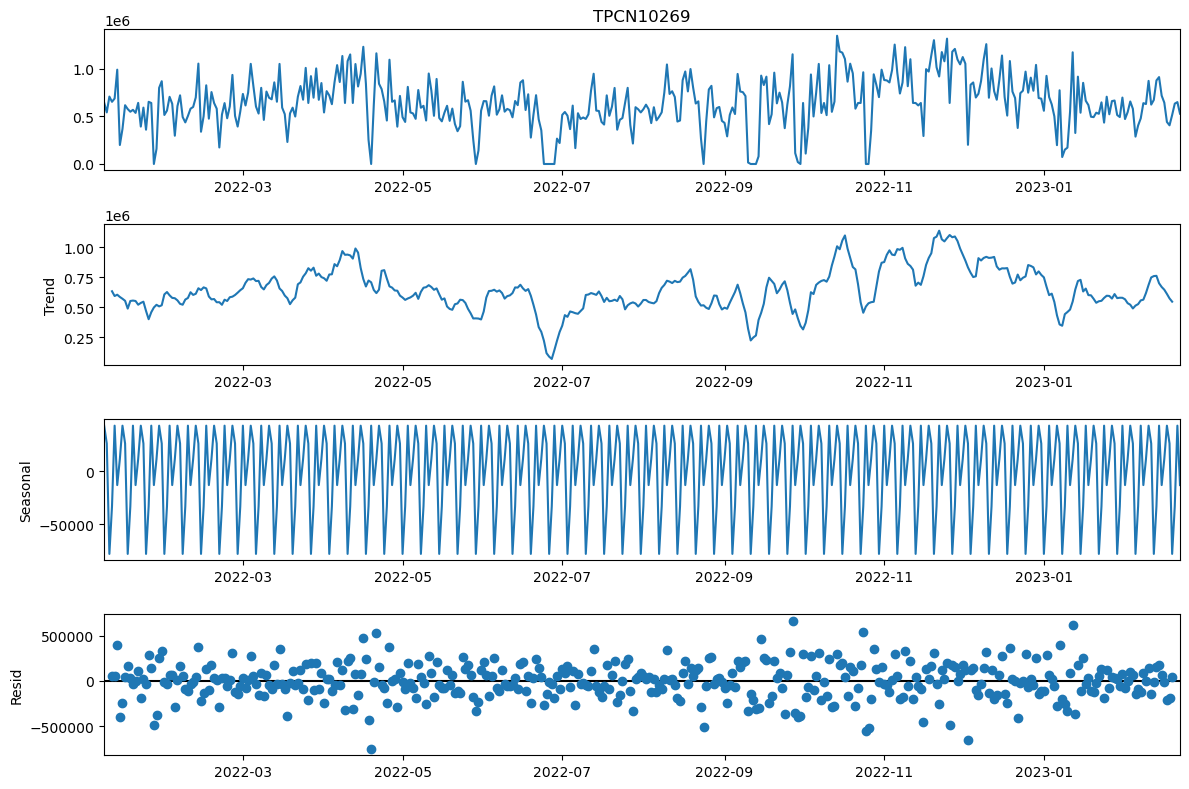

In [10]:
#Additive Decomposition
for atm in df_new.columns:
    rcParams['figure.figsize'] = 12, 8
    decomposition = sm.tsa.seasonal_decompose(df_new[atm], model='additive') # additive seasonal index
    fig = decomposition.plot()
    plt.show()

In [11]:
train_len = 405
train = df_new[0:train_len] # first 120 months as training set
test = df_new[train_len:] # last 24 months as out-of-time test set

In [12]:
test

APAN11109  APAN22403  APAN23217  APAN35706  APCN00816  S1CN1142  \
caldate                                                                       
2023-02-16   279500.0   933500.0   520500.0   161500.0    71500.0   43000.0   
2023-02-17   572500.0   306500.0   606500.0   110100.0    49000.0   20000.0   
2023-02-18   270500.0   166500.0   513100.0    26800.0    75000.0  104500.0   
2023-02-19   337500.0   270500.0   464600.0    29300.0     4500.0   97000.0   
2023-02-20   399500.0   359000.0   401800.0   139900.0   142000.0   83000.0   
2023-02-21   298000.0   553500.0   250900.0   113900.0   117000.0  119000.0   
2023-02-22   280500.0   898500.0   650400.0    48000.0    95000.0       0.0   

            S1CN2011  S1CN2022  S1CN2820  S1CN3514  SPCN02020  SPCND067  \
caldate                                                                   
2023-02-16  232500.0  444600.0  135000.0  398000.0        0.0  757500.0   
2023-02-17  301000.0  435600.0       0.0  364000.0    74000.0  684000.0   
2023-02-18   51000.0  494600.0       0.0  479000.0   363000.0  450000.0   
2023-02-19   10000.0  468900.0       0.0  470000.0   316000.0  365500.0   
2023-02-20  285600.0  390700.0       0.0  353500.0    58500.0  900000.0   
2023-02-21  186600.0  196400.0       0.0  305500.0        0.0  759000.0   
2023-02-22       0.0       0.0       0.0       0.0   176000.0       0.0   

            SPCNG376  T1BH000011116  T1BH000274012  T1BH000603091  \
caldate                                                             
2023-02-16  250000.0       307000.0       395500.0       369000.0   
2023-02-17  497500.0       740900.0       322700.0       339000.0   
2023-02-18  152000.0       369800.0       166700.0       187000.0   
2023-02-19  132500.0       605900.0       242100.0       225000.0   
2023-02-20  264000.0       453200.0       376500.0       388500.0   
2023-02-21  190000.0       456000.0       303000.0       236500.0   
2023-02-22       0.0       480200.0       381700.0       208000.0   

            T1BH007252090  T1NH000575414  T1NY000166081  TPCN10269  
caldate                                                             
2023-02-16       128000.0       456000.0       643300.0   645200.0  
2023-02-17       458000.0       538000.0       236100.0   441900.0  
2023-02-18       195500.0       547500.0       387700.0   406500.0  
2023-02-19            0.0       616000.0       422600.0   514900.0  
2023-02-20            0.0       667500.0       250500.0   634300.0  
2023-02-21            0.0       609000.0       428900.0   650500.0  
2023-02-22       137600.0       452500.0       302500.0   528700.0

### Naive method

In [13]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['APAN11109'][train_len-1]

### Plot train, test and forecast

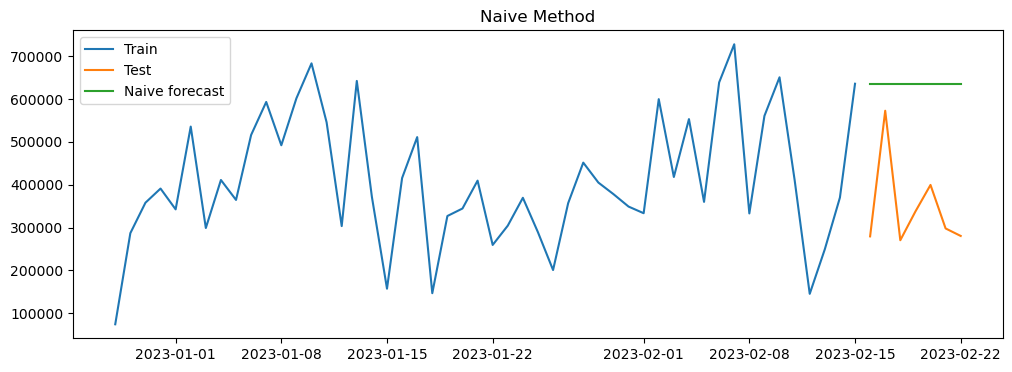

In [14]:
plt.figure(figsize=(12,4))
plt.plot(train[-50:]['APAN11109'], label='Train')
plt.plot(test['APAN11109'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [15]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['APAN11109'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['APAN11109']-y_hat_naive['naive_forecast'])/test['APAN11109'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method       RMSE   MAPE
0  Naive method  304340.33  94.36

### Simple moving average method

In [16]:
y_hat_sma = df_new.copy()
ma_window = 7
y_hat_sma['sma_forecast'] = df_new['APAN11109'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

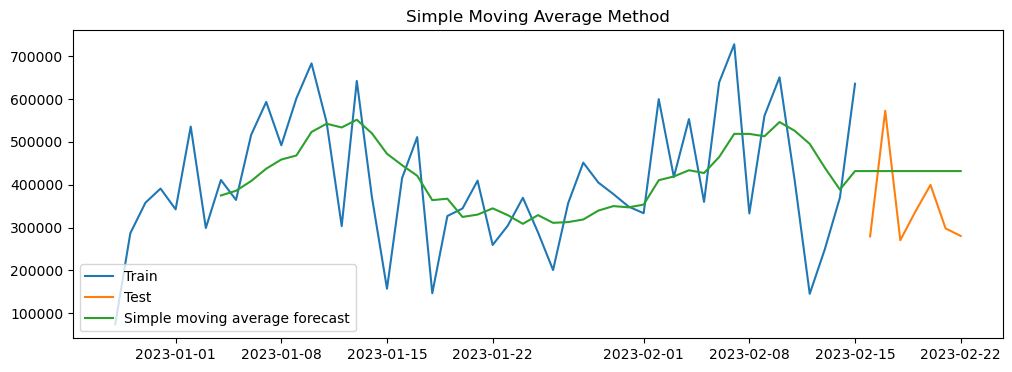

In [17]:
plt.figure(figsize=(12,4))
plt.plot(train[-50:]['APAN11109'], label='Train')
plt.plot(test['APAN11109'], label='Test')
plt.plot(y_hat_sma[-50:]['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [18]:
rmse = np.sqrt(mean_squared_error(test['APAN11109'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['APAN11109']-y_hat_sma['sma_forecast'][train_len:])/test['APAN11109'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method       RMSE   MAPE
0                    Naive method  304340.33  94.36
0  Simple moving average forecast  130779.36  39.08

### Simple exponential smoothing

In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['APAN11109'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

### Plot train, test and forecast

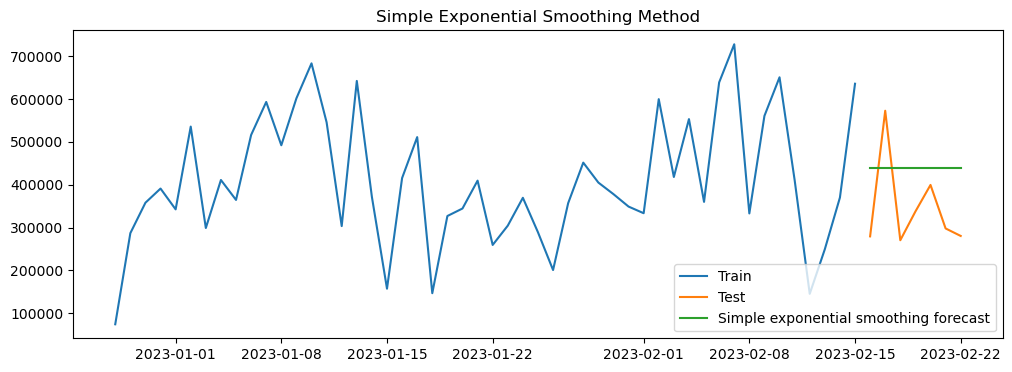

In [20]:
plt.figure(figsize=(12,4))
plt.plot(train[-50:]['APAN11109'], label='Train')
plt.plot(test['APAN11109'], label='Test')
plt.plot(y_hat_ses[-50:]['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [21]:
rmse = np.sqrt(mean_squared_error(test['APAN11109'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['APAN11109']-y_hat_ses['ses_forecast'])/test['APAN11109'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

Method       RMSE   MAPE
0                           Naive method  304340.33  94.36
0         Simple moving average forecast  130779.36  39.08
0  Simple exponential smoothing forecast  135807.00  41.04

### Holt's method with trend

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['APAN11109']) ,seasonal_periods=7 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 153933.33333333326, 'initial_trend': 17212.121212121223, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

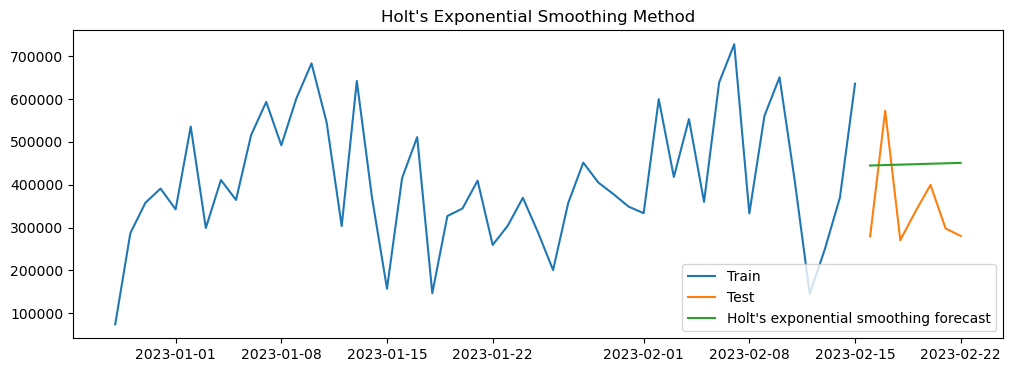

In [23]:
plt.figure(figsize=(12,4))
plt.plot( train[-50:]['APAN11109'], label='Train')
plt.plot(test['APAN11109'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [24]:
rmse = np.sqrt(mean_squared_error(test['APAN11109'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['APAN11109']-y_hat_holt['holt_forecast'])/test['APAN11109'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method       RMSE   MAPE
0                           Naive method  304340.33  94.36
0         Simple moving average forecast  130779.36  39.08
0  Simple exponential smoothing forecast  135807.00  41.04
0    Holt's exponential smoothing method  142030.12  43.32

### Holt Winter's additive method with trend and seasonality

In [25]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['APAN11109']) ,seasonal_periods=7 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(7)

{'smoothing_level': 0.21714285714285714, 'smoothing_trend': 0.0334065934065934, 'smoothing_seasonal': 0.06262857142857144, 'damping_trend': nan, 'initial_level': 133666.66666666657, 'initial_trend': 29806.06060606062, 'initial_seasons': array([-70323.97959184, 152176.02040816,  39140.30612245, -78841.83673469,
       -65752.55102041, 123104.59183673, -99502.55102041]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

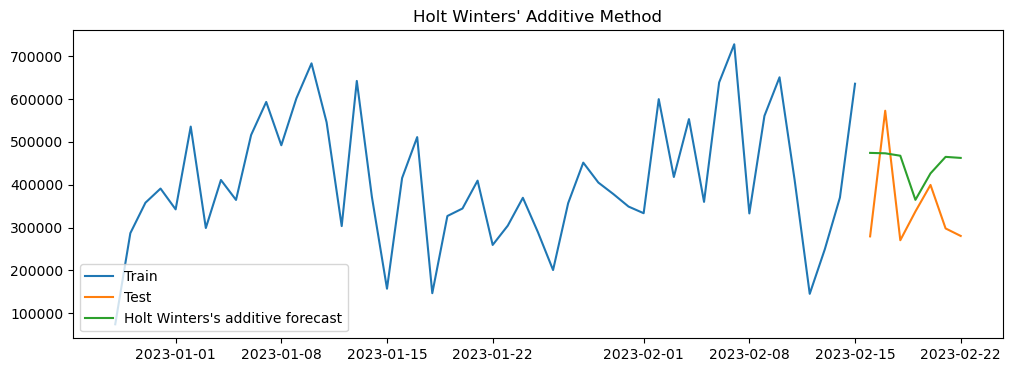

In [26]:
plt.figure(figsize=(12,4))
plt.plot( train[-50:]['APAN11109'], label='Train')
plt.plot(test['APAN11109'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [27]:
rmse = np.sqrt(mean_squared_error(test['APAN11109'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['APAN11109']-y_hat_hwa['hw_forecast'])/test['APAN11109'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method       RMSE   MAPE
0                           Naive method  304340.33  94.36
0         Simple moving average forecast  130779.36  39.08
0  Simple exponential smoothing forecast  135807.00  41.04
0    Holt's exponential smoothing method  142030.12  43.32
0          Holt Winters' additive method  145916.22  42.22

## Auto Regressive methods

### Stationarity vs non-stationary time series

#### Augmented Dickey-Fuller (ADF) test

In [28]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_new['APAN11109'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -6.811518
Critical Values @ 0.05: -2.87
p-value: 0.000000


#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [29]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df_new['APAN11109'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.491990
Critical Values @ 0.05: 0.46
p-value: 0.010000


### Box Cox transformation to make variance constant

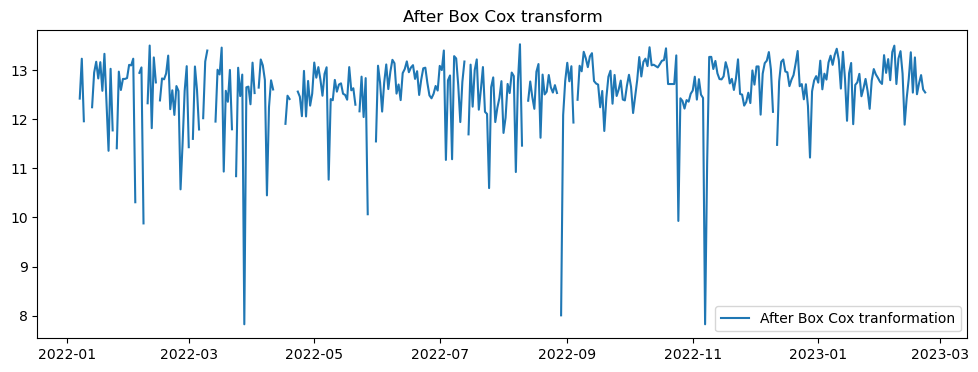

In [30]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df_new['APAN11109'], lmbda=0), index = df_new.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

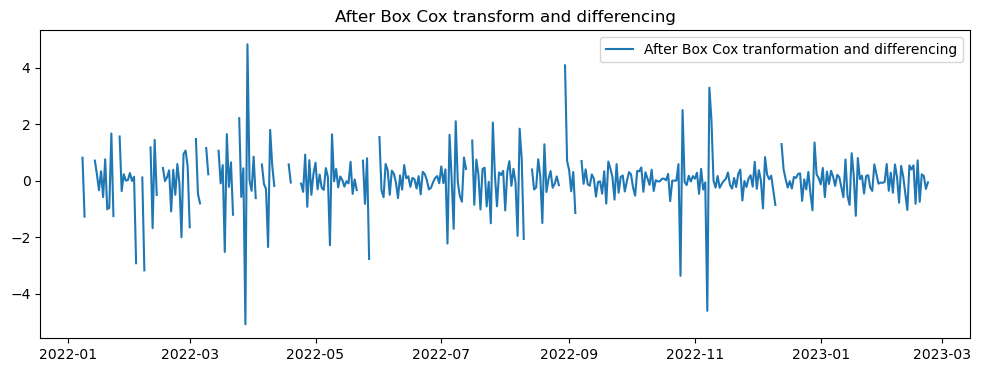

In [31]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df_new.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [32]:
data_boxcox_diff.dropna(inplace=True)
data_boxcox_diff.tail()
data_boxcox_diff.isna().sum()

0

### Auto Correlation

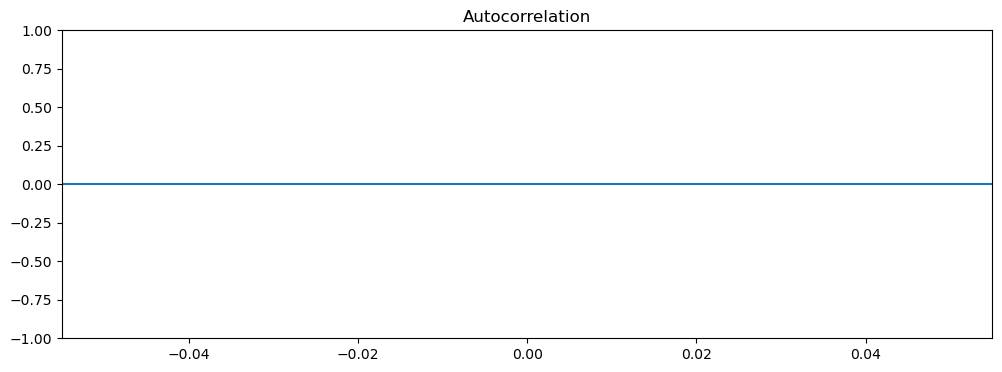

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

### Partial autocorrelation function (PACF)

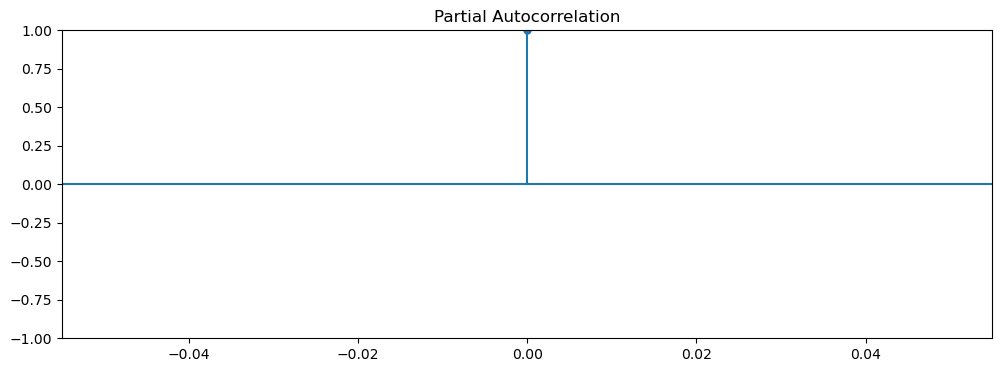

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 7)
plt.show()

In [35]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [36]:
train_data_boxcox

caldate
2022-01-07    12.419166
2022-01-08    13.231218
2022-01-09    11.957611
2022-01-10         -inf
2022-01-11         -inf
                ...    
2023-02-11    12.926348
2023-02-12    11.887931
2023-02-13    12.427214
2023-02-14    12.821258
2023-02-15    13.362167
Length: 405, dtype: float64

### Auto regression method (AR)

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['APAN11109'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      3.427502e-01
ma.L1     -9.789477e-01
ar.S.L7   -3.283586e-02
ma.S.L7   -9.207535e-01
sigma2     6.123814e+10
dtype: float64


In [38]:
y_hat_sarima = test.copy()
y_hat_sarima['sarima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

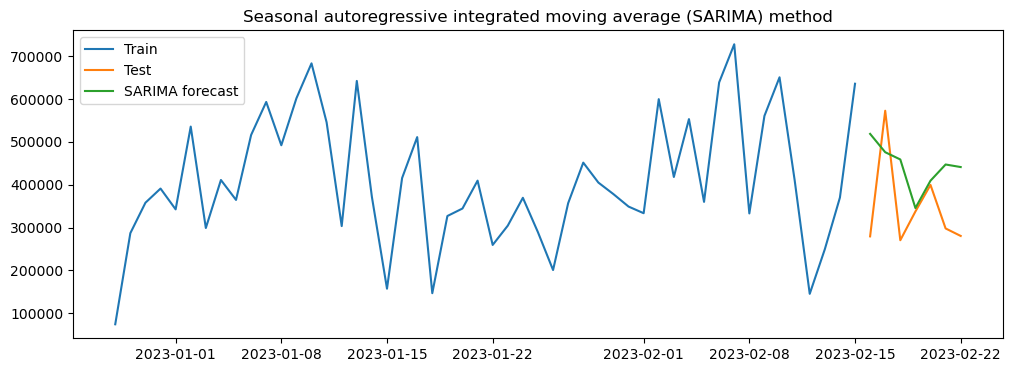

In [39]:
plt.figure(figsize=(12,4))
plt.plot(train[-50:]['APAN11109'], label='Train')
plt.plot(test['APAN11109'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [40]:
rmse = np.sqrt(mean_squared_error(test['APAN11109'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['APAN11109']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['APAN11109'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

Method       RMSE   MAPE
0                                       Naive method  304340.33  94.36
0                     Simple moving average forecast  130779.36  39.08
0              Simple exponential smoothing forecast  135807.00  41.04
0                Holt's exponential smoothing method  142030.12  43.32
0                      Holt Winters' additive method  145916.22  42.22
0  Seasonal autoregressive integrated moving aver...  146485.45  40.61

### Transform Data

In [311]:
x = pd.DataFrame()
y = []

df_new = df.pivot_table(columns='ATMID', index='caldate')
df_new.columns = [col[1] for col in df_new.columns]
df_new.drop(columns=['T1BH000003039'], inplace=True)

for atm in df_new.columns:
    temp = df_new.loc[:, [atm]][-180:]
    for i in range(143):
        temp['dt'] = temp.index
        train_temp = temp[:30].pivot_table(columns=['dt'])
        train_temp.columns = range(30)
        test_temp = temp[30:37][atm].sum()
        x = pd.concat([x, train_temp])
        y.append(test_temp)
        temp = temp.iloc[1:, :]

In [312]:
x

0         1         2         3         4         5   \
APAN11109   277500.0       0.0    3000.0  177000.0  355000.0  513000.0   
APAN11109        0.0    3000.0  177000.0  355000.0  513000.0  352000.0   
APAN11109     3000.0  177000.0  355000.0  513000.0  352000.0  478500.0   
APAN11109   177000.0  355000.0  513000.0  352000.0  478500.0  152000.0   
APAN11109   355000.0  513000.0  352000.0  478500.0  152000.0       0.0   
...              ...       ...       ...       ...       ...       ...   
TPCN10269  1174000.0  326000.0  918000.0  539000.0  853000.0  664400.0   
TPCN10269   326000.0  918000.0  539000.0  853000.0  664400.0  619500.0   
TPCN10269   918000.0  539000.0  853000.0  664400.0  619500.0  496600.0   
TPCN10269   539000.0  853000.0  664400.0  619500.0  496600.0  492500.0   
TPCN10269   853000.0  664400.0  619500.0  496600.0  492500.0  539000.0   

                 6         7         8         9   ...        20        21  \
APAN11109  352000.0  478500.0  152000.0       0.0  ...  329000.0  207500.0   
APAN11109  478500.0  152000.0       0.0  241500.0  ...  207500.0  289000.0   
APAN11109  152000.0       0.0  241500.0  483000.0  ...  289000.0  128000.0   
APAN11109       0.0  241500.0  483000.0  431500.0  ...  128000.0  251500.0   
APAN11109  241500.0  483000.0  431500.0  642000.0  ...  251500.0  386000.0   
...             ...       ...       ...       ...  ...       ...       ...   
TPCN10269  619500.0  496600.0  492500.0  539000.0  ...  472400.0  544800.0   
TPCN10269  496600.0  492500.0  539000.0  527500.0  ...  544800.0  657100.0   
TPCN10269  492500.0  539000.0  527500.0  648000.0  ...  657100.0  579500.0   
TPCN10269  539000.0  527500.0  648000.0  435000.0  ...  579500.0  287900.0   
TPCN10269  527500.0  648000.0  435000.0  707100.0  ...  287900.0  404900.0   

                 22        23        24        25        26        27  \
APAN11109  289000.0  128000.0  251500.0  386000.0  436500.0  223000.0   
APAN11109  128000.0  251500.0  386000.0  436500.0  223000.0  400500.0   
APAN11109  251500.0  386000.0  436500.0  223000.0  400500.0  261000.0   
APAN11109  386000.0  436500.0  223000.0  400500.0  261000.0  298000.0   
APAN11109  436500.0  223000.0  400500.0  261000.0  298000.0  357000.0   
...             ...       ...       ...       ...       ...       ...   
TPCN10269  657100.0  579500.0  287900.0  404900.0  479200.0  639600.0   
TPCN10269  579500.0  287900.0  404900.0  479200.0  639600.0  630200.0   
TPCN10269  287900.0  404900.0  479200.0  639600.0  630200.0  873600.0   
TPCN10269  404900.0  479200.0  639600.0  630200.0  873600.0  624200.0   
TPCN10269  479200.0  639600.0  630200.0  873600.0  624200.0  673700.0   

                 28        29  
APAN11109  400500.0  261000.0  
APAN11109  261000.0  298000.0  
APAN11109  298000.0  357000.0  
APAN11109  357000.0  243000.0  
APAN11109  243000.0  238500.0  
...             ...       ...  
TPCN10269  630200.0  873600.0  
TPCN10269  873600.0  624200.0  
TPCN10269  624200.0  673700.0  
TPCN10269  673700.0  878200.0  
TPCN10269  878200.0  913500.0  

[2860 rows x 30 columns]

In [313]:
for col in x.columns:
    median_value = x[col].mean()
    max_limit = x[col].quantile(0.75) + 1.5*(x[col].quantile(0.75) - x[col].quantile(0.25))
    min_limit = x[col].quantile(0.25) - 1.5*(x[col].quantile(0.75) - x[col].quantile(0.25))
    x.loc[((x[col] > max_limit) | (x[col] < min_limit)), [col]] = median_value

In [314]:
x[30] = y

In [315]:
x

0         1         2         3         4         5   \
APAN11109   277500.0       0.0    3000.0  177000.0  355000.0  513000.0   
APAN11109        0.0    3000.0  177000.0  355000.0  513000.0  352000.0   
APAN11109     3000.0  177000.0  355000.0  513000.0  352000.0  478500.0   
APAN11109   177000.0  355000.0  513000.0  352000.0  478500.0  152000.0   
APAN11109   355000.0  513000.0  352000.0  478500.0  152000.0       0.0   
...              ...       ...       ...       ...       ...       ...   
TPCN10269  1174000.0  326000.0  918000.0  539000.0  853000.0  664400.0   
TPCN10269   326000.0  918000.0  539000.0  853000.0  664400.0  619500.0   
TPCN10269   918000.0  539000.0  853000.0  664400.0  619500.0  496600.0   
TPCN10269   539000.0  853000.0  664400.0  619500.0  496600.0  492500.0   
TPCN10269   853000.0  664400.0  619500.0  496600.0  492500.0  539000.0   

                 6         7         8         9   ...        21        22  \
APAN11109  352000.0  478500.0  152000.0       0.0  ...  207500.0  289000.0   
APAN11109  478500.0  152000.0       0.0  241500.0  ...  289000.0  128000.0   
APAN11109  152000.0       0.0  241500.0  483000.0  ...  128000.0  251500.0   
APAN11109       0.0  241500.0  483000.0  431500.0  ...  251500.0  386000.0   
APAN11109  241500.0  483000.0  431500.0  642000.0  ...  386000.0  436500.0   
...             ...       ...       ...       ...  ...       ...       ...   
TPCN10269  619500.0  496600.0  492500.0  539000.0  ...  544800.0  657100.0   
TPCN10269  496600.0  492500.0  539000.0  527500.0  ...  657100.0  579500.0   
TPCN10269  492500.0  539000.0  527500.0  648000.0  ...  579500.0  287900.0   
TPCN10269  539000.0  527500.0  648000.0  435000.0  ...  287900.0  404900.0   
TPCN10269  527500.0  648000.0  435000.0  707100.0  ...  404900.0  479200.0   

                 23        24        25        26        27        28  \
APAN11109  128000.0  251500.0  386000.0  436500.0  223000.0  400500.0   
APAN11109  251500.0  386000.0  436500.0  223000.0  400500.0  261000.0   
APAN11109  386000.0  436500.0  223000.0  400500.0  261000.0  298000.0   
APAN11109  436500.0  223000.0  400500.0  261000.0  298000.0  357000.0   
APAN11109  223000.0  400500.0  261000.0  298000.0  357000.0  243000.0   
...             ...       ...       ...       ...       ...       ...   
TPCN10269  579500.0  287900.0  404900.0  479200.0  639600.0  630200.0   
TPCN10269  287900.0  404900.0  479200.0  639600.0  630200.0  873600.0   
TPCN10269  404900.0  479200.0  639600.0  630200.0  873600.0  624200.0   
TPCN10269  479200.0  639600.0  630200.0  873600.0  624200.0  673700.0   
TPCN10269  639600.0  630200.0  873600.0  624200.0  673700.0  878200.0   

                 29         30  
APAN11109  261000.0  2174000.0  
APAN11109  298000.0  2060500.0  
APAN11109  357000.0  1963500.0  
APAN11109  243000.0  2082000.0  
APAN11109  238500.0  2420000.0  
...             ...        ...  
TPCN10269  873600.0  4894800.0  
TPCN10269  624200.0  4677100.0  
TPCN10269  673700.0  4518300.0  
TPCN10269  878200.0  4274400.0  
TPCN10269  913500.0  4011400.0  

[2860 rows x 31 columns]

<Axes: >

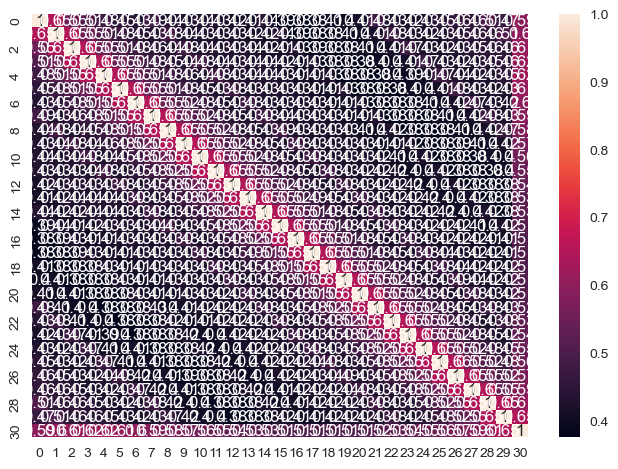

In [316]:
sns.heatmap(x.corr(), annot=True)

We can see that Y is correlated with previouse day dispense 

In [317]:
x.drop(columns=[30], inplace=True)

### Train Test Split

In [318]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

### Scale

In [319]:
x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

In [320]:
X_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

array([  28326.55821218,  440700.667038  ,  390967.50542515,
        410680.57542677,  531912.38040189,  501392.26544236,
        560717.13136054,  539102.67993589,  236111.10700693,
        263894.96413964,  308263.90621567,  262195.14095336,
        184177.33157982,  332996.72408876,   54754.81771598,
        178643.99120669, -123201.75114885,   25226.61255492,
         35014.99852232,   92693.65182523,  -40160.16771929,
        192033.43818451,   62615.48855219,   22874.79504078,
        371625.32887927,  224180.63348078,  151186.06175063,
        169108.72591067,  368677.56632375,  485735.64271033,
       1307483.99051158])

In [321]:
X_test_sm = sm.add_constant(x_test)
y_test_pred = lr_model.predict(X_test_sm)
r2_score(y_test, y_test_pred)

0.7269629665073123

In [322]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:35:07   Log-Likelihood:                -38931.
No. Observations:                2574   AIC:                         7.792e+04
Df Residuals:                    2543   BIC:                         7.810e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.833e+04   4.22e+04      0.672      0.502   -5.44e+04    1.11e+05
x1          4.407e+05   1.16e+05      3.797      0.000    2.13e+05    6.68e+05
x2           3.91e+05   1.22e+05      3.194      0.001    1.51e+05    6.31e+05
x3          4.107e+05   1.22e+05      3.357      0.001    1.71e+05    6.51e+05
x4          5.319e+05   1.23e+05      4.319      0.000     2.9e+05    7.73e+05
x5          5.014e+05   1.22e+05      4.102      0.000    2.62e+05    7.41e+05
x6          5.607e+05   1.22e+05      4.604      0.000    3.22e+05       8e+05
x7          5.391e+05   1.22e+05      4.411      0.000    2.99e+05    7.79e+05
x8          2.361e+05   1.24e+05      1.901      0.057   -7401.760     4.8e+05
x9          2.639e+05   1.23e+05      2.144      0.032    2.26e+04    5.05e+05
x10         3.083e+05   1.24e+05      2.494      0.013    6.59e+04    5.51e+05
x11         2.622e+05   1.23e+05      2.127      0.034    2.04e+04    5.04e+05
x12         1.842e+05    1.2e+05      1.532      0.126   -5.15e+04     4.2e+05
x13          3.33e+05   1.21e+05      2.763      0.006    9.67e+04    5.69e+05
x14         5.475e+04   1.21e+05      0.453      0.651   -1.82e+05    2.92e+05
x15         1.786e+05   1.21e+05      1.473      0.141   -5.92e+04    4.17e+05
x16        -1.232e+05   1.21e+05     -1.021      0.308    -3.6e+05    1.14e+05
x17         2.523e+04   1.21e+05      0.209      0.834   -2.11e+05    2.62e+05
x18         3.501e+04   1.21e+05      0.290      0.771   -2.01e+05    2.71e+05
x19         9.269e+04   1.21e+05      0.767      0.443   -1.44e+05     3.3e+05
x20        -4.016e+04    1.2e+05     -0.333      0.739   -2.76e+05    1.96e+05
x21          1.92e+05   1.21e+05      1.585      0.113   -4.55e+04     4.3e+05
x22         6.262e+04   1.22e+05      0.514      0.607   -1.76e+05    3.01e+05
x23         2.287e+04    1.2e+05      0.190      0.849   -2.13e+05    2.59e+05
x24         3.716e+05    1.2e+05      3.090      0.002    1.36e+05    6.07e+05
x25         2.242e+05    1.2e+05      1.865      0.062   -1.16e+04     4.6e+05
x26         1.512e+05   1.21e+05      1.247      0.213   -8.66e+04    3.89e+05
x27         1.691e+05   1.23e+05      1.377      0.169   -7.17e+04     4.1e+05
x28         3.687e+05   1.22e+05      3.034      0.002     1.3e+05    6.07e+05
x29         4.857e+05   1.21e+05      4.012      0.000    2.48e+05    7.23e+05
x30         1.307e+06   1.14e+05     11.489      0.000    1.08e+06    1.53e+06
==============================================================================
Omnibus:                      190.166   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.384
Skew:                           0.279   Prob(JB):                    1.37e-157
Kurtosis:                       5.534   Cond. No.                         21.7
==

In [323]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_test_pred = lm.predict(x_test)
r2_score(y_test, y_test_pred)

0.7269629665073126

In [324]:
x[30] = y
x.head()

0         1         2         3         4         5   \
APAN11109  277500.0       0.0    3000.0  177000.0  355000.0  513000.0   
APAN11109       0.0    3000.0  177000.0  355000.0  513000.0  352000.0   
APAN11109    3000.0  177000.0  355000.0  513000.0  352000.0  478500.0   
APAN11109  177000.0  355000.0  513000.0  352000.0  478500.0  152000.0   
APAN11109  355000.0  513000.0  352000.0  478500.0  152000.0       0.0   

                 6         7         8         9   ...        21        22  \
APAN11109  352000.0  478500.0  152000.0       0.0  ...  207500.0  289000.0   
APAN11109  478500.0  152000.0       0.0  241500.0  ...  289000.0  128000.0   
APAN11109  152000.0       0.0  241500.0  483000.0  ...  128000.0  251500.0   
APAN11109       0.0  241500.0  483000.0  431500.0  ...  251500.0  386000.0   
APAN11109  241500.0  483000.0  431500.0  642000.0  ...  386000.0  436500.0   

                 23        24        25        26        27        28  \
APAN11109  128000.0  251500.0  386000.0  436500.0  223000.0  400500.0   
APAN11109  251500.0  386000.0  436500.0  223000.0  400500.0  261000.0   
APAN11109  386000.0  436500.0  223000.0  400500.0  261000.0  298000.0   
APAN11109  436500.0  223000.0  400500.0  261000.0  298000.0  357000.0   
APAN11109  223000.0  400500.0  261000.0  298000.0  357000.0  243000.0   

                 29         30  
APAN11109  261000.0  2174000.0  
APAN11109  298000.0  2060500.0  
APAN11109  357000.0  1963500.0  
APAN11109  243000.0  2082000.0  
APAN11109  238500.0  2420000.0  

[5 rows x 31 columns]

In [325]:
train, test = train_test_split(x, test_size=0.2)
train.shape, test.shape

((2288, 31), (572, 31))

In [326]:
train

0         1         2         3         4         5   \
APAN11109      476500.0  178500.0  411000.0  509500.0  536000.0  638500.0   
T1NY000166081  744100.0  639800.0  512100.0  357600.0  418500.0   83700.0   
T1BH000274012  502700.0  408400.0  368000.0  291800.0  312100.0  541400.0   
SPCNG376       242500.0  324500.0   82000.0  197500.0  343500.0  209000.0   
S1CN1142       381000.0  219500.0  323000.0  253000.0  298000.0  194500.0   
...                 ...       ...       ...       ...       ...       ...   
T1BH000603091  659500.0  242000.0  200500.0  301000.0  278500.0  284500.0   
S1CN1142       177600.0  302500.0  209500.0  240600.0  338800.0  347300.0   
APAN22403      580600.0  552500.0  523100.0  469200.0  235100.0  463600.0   
SPCND067       491000.0  613000.0  776000.0  370500.0  774000.0  704500.0   
T1NH000575414  195000.0  567500.0  373000.0  395500.0  307000.0  405000.0   

                      6          7         8         9   ...        21  \
APAN11109       448000.0   189000.0       0.0   96500.0  ...  332500.0   
T1NY000166081   185500.0   193100.0  316500.0  280600.0  ...   70500.0   
T1BH000274012   302900.0   354300.0  276700.0  437800.0  ...  197200.0   
SPCNG376        300000.0   385500.0  336500.0  162500.0  ...  285000.0   
S1CN1142        321000.0   230500.0  325500.0  177600.0  ...       0.0   
...                  ...        ...       ...       ...  ...       ...   
T1BH000603091   326500.0   336000.0  287000.0  236000.0  ...  655000.0   
S1CN1142        166900.0   248200.0  346500.0  506900.0  ...       0.0   
APAN22403       390300.0   435900.0  424700.0  516300.0  ...  667500.0   
SPCND067       1041500.0  1085500.0  746500.0  895000.0  ...  756500.0   
T1NH000575414   361500.0   401000.0  164500.0       0.0  ...  196000.0   

                      22        23        24        25        26        27  \
APAN11109       244000.0  331500.0  213000.0   74500.0  287000.0  358000.0   
T1NY000166081   256800.0  332400.0  346900.0  278000.0  287500.0  286400.0   
T1BH000274012   313400.0  308300.0  227100.0  329700.0  601700.0  174100.0   
SPCNG376        293000.0  150000.0  153000.0  232500.0  410000.0  434500.0   
S1CN1142        102500.0  372500.0   68500.0  112000.0  104000.0  317500.0   
...                  ...       ...       ...       ...       ...       ...   
T1BH000603091   304500.0  123000.0  465500.0  452500.0  556500.0  401500.0   
S1CN1142             0.0  117500.0  249000.0  319000.0  263500.0  121000.0   
APAN22403       786000.0  637000.0  597000.0  179000.0  607000.0  621000.0   
SPCND067       1111000.0  941000.0  192500.0  765500.0  753000.0  634000.0   
T1NH000575414   659500.0  556500.0  737500.0  544000.0  505000.0  204000.0   

                     28        29         30  
APAN11109      391000.0  342500.0  3211000.0  
T1NY000166081  275500.0   47800.0  2920100.0  
T1BH000274012  162000.0  446000.0  2445600.0  
SPCNG376       294000.0  548000.0  2095000.0  
S1CN1142        22000.0       0.0  1070000.0  
...                 ...       ...        ...  
T1BH000603091  349500.0  344500.0  2590500.0  
S1CN1142       155000.0       0.0  1361500.0  
APAN22403      685000.0  679000.0  3317000.0  
SPCND067       664500.0  857000.0  4691000.0  
T1NH000575414    5500.0  327000.0  2942000.0  

[2288 rows x 31 columns]

In [270]:
# scaler = MinMaxScaler()
# train = scaler.fit_transform(train)
# test = scaler.transform(test)
# train

In [300]:
from pycaret.regression import *

In [327]:
s = setup(train, target = 30, session_id = 123, index=False)

In [ ]:
best = compare_models()

Initiated  . . . . . . . . . . . . . . . . . .            22:35:52
Status     . . . . . . . . . . . . . . . . . .    Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  AdaBoost Regressor

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [303]:
# evaluate_model(best)
model = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [304]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 123,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [305]:
y_test_pred = model.predict(test.iloc[:, :-1])

In [306]:
r2_score(test.iloc[:, -1:], y_test_pred)

0.6413783861451494